# Bottom Temperature for SOE
https://noaa-edab.github.io/catalog/bottom_temp_comp.html

In [1]:
# import relevant packages
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import regionmask
import READ_EDAB_Utilities_py as reupy
import copernicusmarine
import numpy as np
import os
import pandas as pn
from datetime import datetime

In [2]:
# Load in the mom6 data
#url = "http://psl.noaa.gov/thredds/dodsC/Projects/CEFI/regional_mom6/northwest_atlantic/hist_run/regrid/ocean_monthly.199301-201912.tob.nc"
#mom6_bt = xr.open_dataset(url)

In [3]:
# Load mom6 data
#mom6_bt = xr.open_dataset('ocean_monthly.199301-201912.tob.nc')
mom6_bt_cropped = xr.open_dataset('mom6_bt_cropped.nc')

In [4]:
#mom6_bt

In [5]:
#mom6_bt_cropped = mom6_bt.sel(lat = slice(30,48), lon = slice(260, 300))

In [6]:
#mom6_bt_cropped.to_netcdf('mom6_bt_cropped.nc')

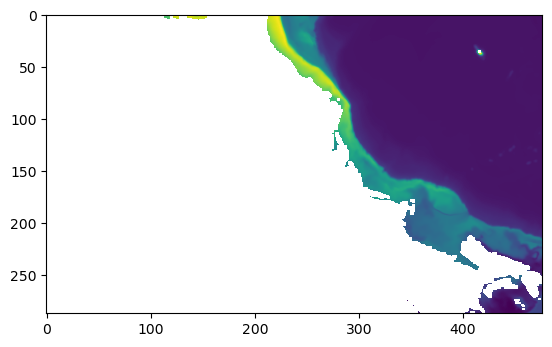

In [7]:
# Take a look at the data
plt.imshow(mom6_bt_cropped.tob[10,:,:])

In [8]:
# Load in the shapefile
epu = gpd.read_file('EPU_shape/EPU_NOESTUARIES.shp')

In [9]:
mab = epu[epu.EPU == 'MAB']
gom = epu[epu.EPU == 'GOM']
ss = epu[epu.EPU == 'SS']
gb = epu[epu.EPU == 'GB']

In [10]:
mab_m6 = reupy.crop_nd(mom6_bt_cropped, 'lon', 'lat', mab)
gom_m6 = reupy.crop_nd(mom6_bt_cropped, 'lon', 'lat', gom)
ss_m6 = reupy.crop_nd(mom6_bt_cropped, 'lon', 'lat', ss)
gb_m6 = reupy.crop_nd(mom6_bt_cropped, 'lon', 'lat', gb)

In [11]:
help(reupy.crop_nd)

Help on function crop_nd in module READ_EDAB_Utilities_py.crop_nd:

crop_nd(data, longitude_name, latitude_name, shape)



In [8]:
#glorys_bt = copernicusmarine.open_dataset(dataset_id="cmems_mod_glo_phy_my_0.083deg_P1M-m")
#glorys_bt

In [9]:
#glorys_bt_cropped = glorys_bt.bottomT.sel(latitude = slice(30,48), longitude = slice(-80, -60))

In [65]:
#Load the glorys data
glorys_bt_cropped = xr.open_dataset('glorys_bt_cropped.nc')

In [66]:
glorys_bt_cropped

<xarray.Dataset>
Dimensions:    (latitude: 217, longitude: 241, time: 342)
Coordinates:
  * latitude   (latitude) float32 30.0 30.08 30.17 30.25 ... 47.83 47.92 48.0
  * longitude  (longitude) float32 -80.0 -79.92 -79.83 ... -60.17 -60.08 -60.0
  * time       (time) datetime64[ns] 1993-01-01 1993-02-01 ... 2021-06-01
Data variables:
    bottomT    (time, latitude, longitude) float32 ...

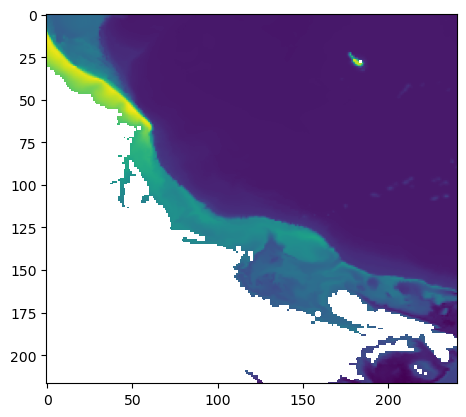

In [67]:
# Take a look at the data
plt.imshow(glorys_bt_cropped.bottomT[10,:,:])

In [68]:
#glorys_bt_cropped.to_netcdf('glorys_bt_cropped')

In [69]:
mab_gl = reupy.crop_nd(glorys_bt_cropped, 'longitude', 'latitude', mab)
gom_gl = reupy.crop_nd(glorys_bt_cropped, 'longitude', 'latitude', gom)
ss_gl = reupy.crop_nd(glorys_bt_cropped, 'longitude', 'latitude', ss)
gb_gl = reupy.crop_nd(glorys_bt_cropped, 'longitude', 'latitude', gb)

In [70]:
mab_gl_anom = mab_gl.mean(['latitude','longitude']).groupby('time.season') - mab_gl.mean(['latitude','longitude']).groupby('time.season').mean('time')

In [71]:
mab_gl_anom = mab_gl.mean(['latitude','longitude']).groupby('time.year').mean()
mab_m6_anom = mab_m6.tob.mean(['lat','lon']).groupby('time.year').mean()

gb_gl_anom = gb_gl.mean(['latitude','longitude']).groupby('time.year').mean()
gb_m6_anom = gb_m6.tob.mean(['lat','lon']).groupby('time.year').mean()

ss_gl_anom = ss_gl.mean(['latitude','longitude']).groupby('time.year').mean()
ss_m6_anom = ss_m6.tob.mean(['lat','lon']).groupby('time.year').mean()

gom_gl_anom = gom_gl.mean(['latitude','longitude']).groupby('time.year').mean()
gom_m6_anom = gom_m6.tob.mean(['lat','lon']).groupby('time.year').mean()

Text(0.5, 1.0, 'SS')

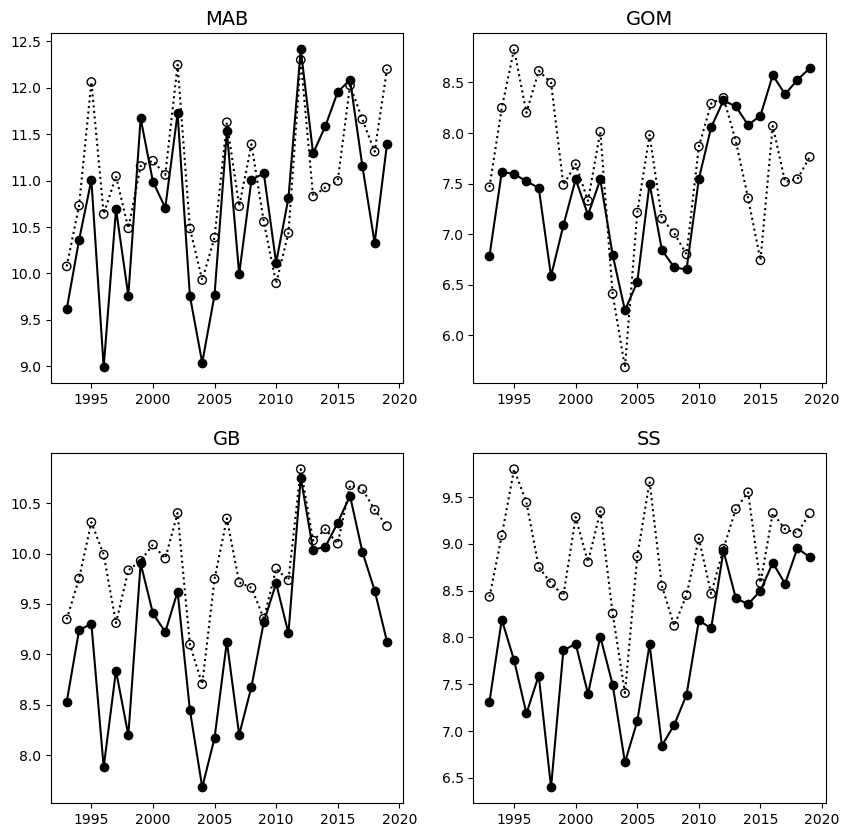

In [72]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = [10,10])

ax[0,0].plot(np.arange(1993, 2020), mab_gl_anom.sel(year = slice(1993, 2019)).bottomT, c = 'k')
ax[0,0].scatter(np.arange(1993, 2020), mab_gl_anom.sel(year = slice(1993, 2019)).bottomT, c = 'k')

ax[0,0].plot(np.arange(1993, 2020), mab_m6_anom.sel(year = slice(1993, 2019)), c = 'k', linestyle = ':')
ax[0,0].scatter(np.arange(1993, 2020), mab_m6_anom.sel(year = slice(1993, 2019)),facecolor = 'none', edgecolor = 'k')

ax[0,0].set_title('MAB', fontsize = 14)


ax[0,1].plot(np.arange(1993, 2020), gom_gl_anom.sel(year = slice(1993, 2019)).bottomT, c = 'k')
ax[0,1].scatter(np.arange(1993, 2020), gom_gl_anom.sel(year = slice(1993, 2019)).bottomT, c = 'k')

ax[0,1].plot(np.arange(1993, 2020), gom_m6_anom.sel(year = slice(1993, 2019)), c = 'k', linestyle = ':')
ax[0,1].scatter(np.arange(1993, 2020), gom_m6_anom.sel(year = slice(1993, 2019)),facecolor = 'none', edgecolor = 'k')

ax[0,1].set_title('GOM', fontsize = 14)


ax[1,0].plot(np.arange(1993, 2020), gb_gl_anom.sel(year = slice(1993, 2019)).bottomT, c = 'k')
ax[1,0].scatter(np.arange(1993, 2020), gb_gl_anom.sel(year = slice(1993, 2019)).bottomT, c = 'k')

ax[1,0].plot(np.arange(1993, 2020), gb_m6_anom.sel(year = slice(1993, 2019)), c = 'k', linestyle = ':')
ax[1,0].scatter(np.arange(1993, 2020), gb_m6_anom.sel(year = slice(1993, 2019)),facecolor = 'none', edgecolor = 'k')

ax[1,0].set_title('GB', fontsize = 14)


ax[1,1].plot(np.arange(1993, 2020), ss_gl_anom.sel(year = slice(1993, 2019)).bottomT, c = 'k')
ax[1,1].scatter(np.arange(1993, 2020), ss_gl_anom.sel(year = slice(1993, 2019)).bottomT, c = 'k')

ax[1,1].plot(np.arange(1993, 2020), ss_m6_anom.sel(year = slice(1993, 2019)), c = 'k', linestyle = ':')
ax[1,1].scatter(np.arange(1993, 2020), ss_m6_anom.sel(year = slice(1993, 2019)),facecolor = 'none', edgecolor = 'k')

ax[1,1].set_title('SS', fontsize = 14)

In [73]:
seasonal_avgs_mab_m6 = mab_m6.mean(['lat','lon']).resample(time = 'QE-JAN').mean()
seasonal_avgs_mab_gl = mab_gl.mean(['latitude','longitude']).resample(time = 'QE-JAN').mean()

In [74]:
seasonal_avgs_gb_m6 = gb_m6.mean(['lat','lon']).resample(time = 'QE-JAN').mean()
seasonal_avgs_gb_gl = gb_gl.mean(['latitude','longitude']).resample(time = 'QE-JAN').mean()

In [75]:
winters_mab_m6 = seasonal_avgs_mab_m6.tob[np.arange(0,109, 4)]
springs_mab_m6 = seasonal_avgs_mab_m6.tob[np.arange(1,109, 4)]
summers_mab_m6 = seasonal_avgs_mab_m6.tob[np.arange(2,109, 4)]
autumns_mab_m6 = seasonal_avgs_mab_m6.tob[np.arange(3,109, 4)]

winters_gb_m6 = seasonal_avgs_gb_m6.tob[np.arange(0,109, 4)]
springs_gb_m6 = seasonal_avgs_gb_m6.tob[np.arange(1,109, 4)]
summers_gb_m6 = seasonal_avgs_gb_m6.tob[np.arange(2,109, 4)]
autumns_gb_m6 = seasonal_avgs_gb_m6.tob[np.arange(3,109, 4)]

In [76]:
winters_mab_gl = seasonal_avgs_mab_gl.bottomT[np.arange(0,109, 4)]
springs_mab_gl = seasonal_avgs_mab_gl.bottomT[np.arange(1,109, 4)]
summers_mab_gl = seasonal_avgs_mab_gl.bottomT[np.arange(2,109, 4)]
autumns_mab_gl = seasonal_avgs_mab_gl.bottomT[np.arange(3,109, 4)]

winters_gb_gl = seasonal_avgs_gb_gl.bottomT[np.arange(0,109, 4)]
springs_gb_gl = seasonal_avgs_gb_gl.bottomT[np.arange(1,109, 4)]
summers_gb_gl = seasonal_avgs_gb_gl.bottomT[np.arange(2,109, 4)]
autumns_gb_gl = seasonal_avgs_gb_gl.bottomT[np.arange(3,109, 4)]

In [77]:
winters_mab_gl[1:] - np.nanmean(winters_mab_gl[1:])

<xarray.DataArray 'bottomT' (time: 27)>
array([-0.6634903 ,  0.20156384, -1.0480757 , -1.589386  , -0.79097843,
       -0.62033844,  0.9815035 , -1.2179174 ,  1.0517273 , -0.3554001 ,
       -0.6188326 , -0.83933353, -0.15401077,  0.85919285, -1.165947  ,
        0.02684784,  0.4560318 , -1.1740961 ,  1.045681  ,  0.20071316,
        0.47890377,  0.8152771 ,  2.0138044 ,  0.65385914,  0.6353617 ,
       -0.28079128,  1.0981512 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1994-01-31 1995-01-31 ... 2020-01-31

<>:62: SyntaxWarning: invalid escape sequence '\c'
<>:62: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Laura.Gruenburg\AppData\Local\Temp\1\ipykernel_3656\3107284188.py:62: SyntaxWarning: invalid escape sequence '\c'
  ax[0,0].set_ylabel('Bottom Temperature Anomaly ($^\circ$C)', fontsize = 12)


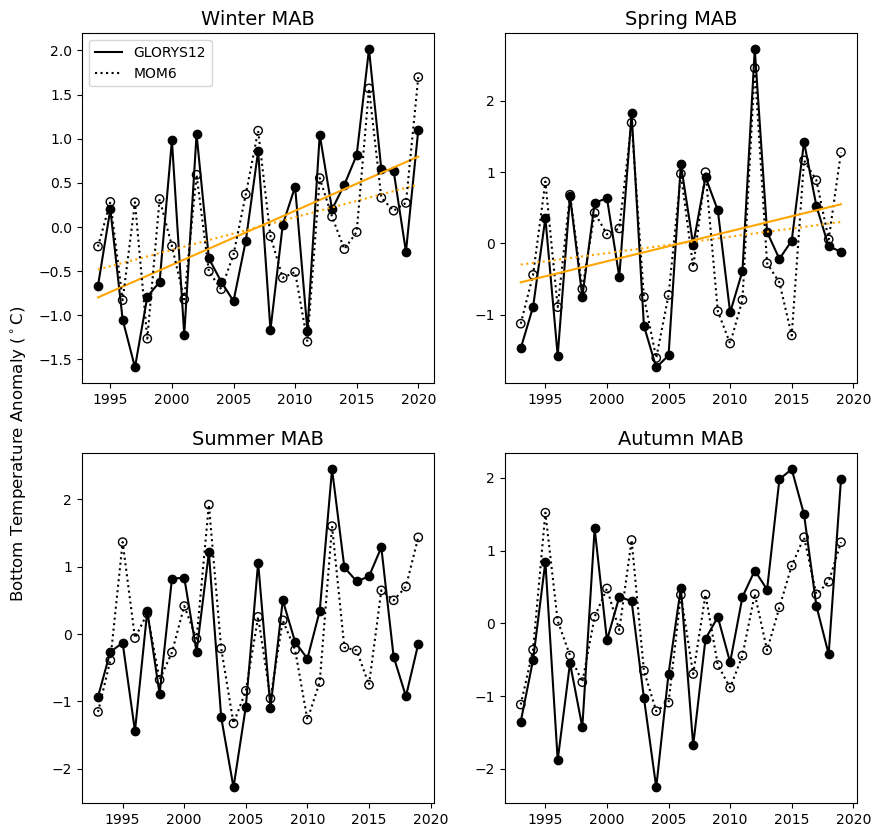

In [78]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = [10,10])

ax[0,0].plot(np.arange(1994, 2021), winters_mab_gl[1:] - np.nanmean(winters_mab_gl[1:]), c = 'k', label = 'GLORYS12')
ax[0,0].scatter(np.arange(1994, 2021), winters_mab_gl[1:] - np.nanmean(winters_mab_gl[1:]), c = 'k')
x1 = np.arange(1994, 2021)
y1 = winters_mab_gl[1:] - np.nanmean(winters_mab_gl[1:])
y2 = winters_mab_m6[1:] - np.nanmean(winters_mab_m6[1:])

z1 = np.polyfit(x1, y1, 1)
z2 = np.polyfit(x1, y2, 1)
p1 = np.poly1d(z1)
p2 = np.poly1d(z2)

#add trendline to plot
ax[0,0].plot(x1, p1(x1), c = 'orange')
ax[0,0].plot(x1, p2(x1), c = 'orange', linestyle = ':')

ax[0,0].plot(np.arange(1994, 2021), winters_mab_m6[1:] - np.nanmean(winters_mab_m6[1:]), c = 'k', linestyle = ':', label = 'MOM6')
ax[0,0].scatter(np.arange(1994, 2021), winters_mab_m6[1:] - np.nanmean(winters_mab_m6[1:]),facecolor = 'none', edgecolor = 'k')

ax[0,0].set_title('Winter MAB', fontsize = 14)


ax[0,1].plot(np.arange(1993, 2020), springs_mab_gl - np.nanmean(springs_mab_gl), c = 'k')
ax[0,1].scatter(np.arange(1993, 2020), springs_mab_gl - np.nanmean(springs_mab_gl), c = 'k')

ax[0,1].plot(np.arange(1993, 2020), springs_mab_m6 - np.nanmean(springs_mab_m6), c = 'k', linestyle = ':')
ax[0,1].scatter(np.arange(1993, 2020), springs_mab_m6 - np.nanmean(springs_mab_m6),facecolor = 'none', edgecolor = 'k')
x2 = np.arange(1993, 2020)
y1a = springs_mab_gl - np.nanmean(springs_mab_gl)
y2a = springs_mab_m6 - np.nanmean(springs_mab_m6)

z1a = np.polyfit(x2, y1a, 1)
z2a = np.polyfit(x2, y2a, 1)
p1a = np.poly1d(z1a)
p2a = np.poly1d(z2a)

#add trendline to plot
ax[0,1].plot(x2, p1a(x2), c = 'orange')
ax[0,1].plot(x2, p2a(x2), c = 'orange', linestyle = ':')

ax[0,1].set_title('Spring MAB', fontsize = 14)


ax[1,0].plot(np.arange(1993, 2020), summers_mab_gl - np.nanmean(summers_mab_gl), c = 'k')
ax[1,0].scatter(np.arange(1993, 2020), summers_mab_gl - np.nanmean(summers_mab_gl), c = 'k')

ax[1,0].plot(np.arange(1993, 2020), summers_mab_m6 - np.nanmean(summers_mab_m6), c = 'k', linestyle = ':')
ax[1,0].scatter(np.arange(1993, 2020), summers_mab_m6 - np.nanmean(summers_mab_m6),facecolor = 'none', edgecolor = 'k')

ax[1,0].set_title('Summer MAB', fontsize = 14)


ax[1,1].plot(np.arange(1993, 2020), autumns_mab_gl - np.nanmean(autumns_mab_gl), c = 'k')
ax[1,1].scatter(np.arange(1993, 2020), autumns_mab_gl - np.nanmean(autumns_mab_gl), c = 'k')
ax[1,1].plot(np.arange(1993, 2020), autumns_mab_m6 - np.nanmean(autumns_mab_m6), c = 'k', linestyle = ':')
ax[1,1].scatter(np.arange(1993, 2020), autumns_mab_m6 - np.nanmean(autumns_mab_m6),facecolor = 'none', edgecolor = 'k')

ax[1,1].set_title('Autumn MAB', fontsize = 14)

ax[0,0].legend(loc='upper left')
ax[0,0].set_ylabel('Bottom Temperature Anomaly ($^\circ$C)', fontsize = 12)
ax[0,0].yaxis.set_label_coords(-0.15,-0.2)

Text(0.5, 1.0, 'Autumn GB')

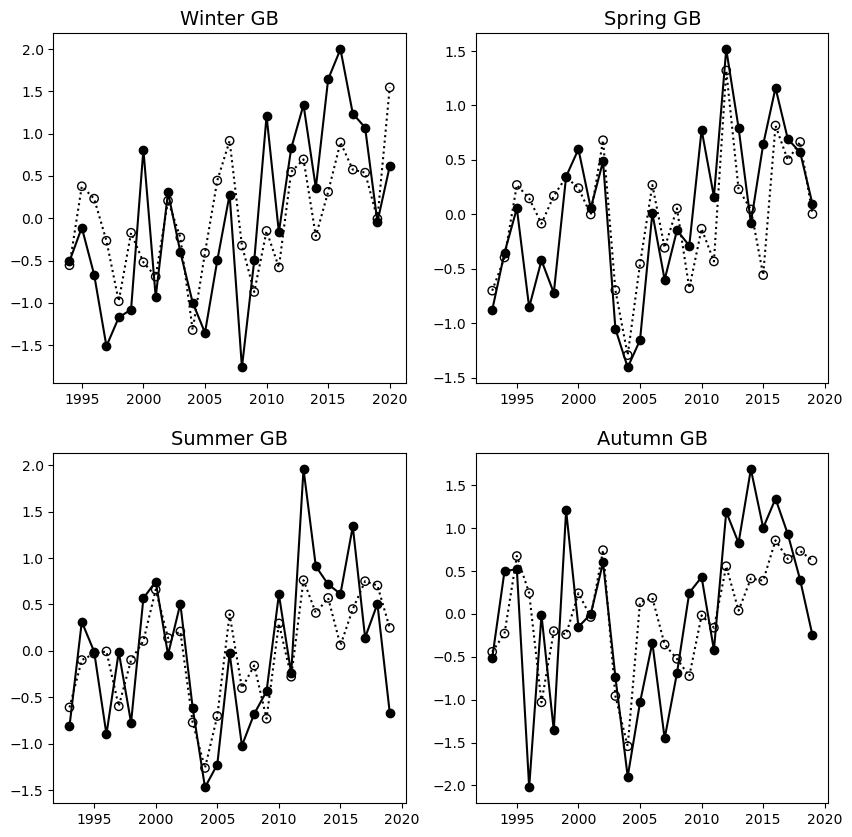

In [79]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = [10,10])

ax[0,0].plot(np.arange(1994, 2021), winters_gb_gl[1:] - np.nanmean(winters_gb_gl[1:]), c = 'k')
ax[0,0].scatter(np.arange(1994, 2021), winters_gb_gl[1:] - np.nanmean(winters_gb_gl[1:]), c = 'k')

ax[0,0].plot(np.arange(1994, 2021), winters_gb_m6[1:] - np.nanmean(winters_gb_m6[1:]), c = 'k', linestyle = ':')
ax[0,0].scatter(np.arange(1994, 2021), winters_gb_m6[1:] - np.nanmean(winters_gb_m6[1:]),facecolor = 'none', edgecolor = 'k')

ax[0,0].set_title('Winter GB', fontsize = 14)


ax[0,1].plot(np.arange(1993, 2020), springs_gb_gl - np.nanmean(springs_gb_gl), c = 'k')
ax[0,1].scatter(np.arange(1993, 2020), springs_gb_gl - np.nanmean(springs_gb_gl), c = 'k')

ax[0,1].plot(np.arange(1993, 2020), springs_gb_m6 - np.nanmean(springs_gb_m6), c = 'k', linestyle = ':')
ax[0,1].scatter(np.arange(1993, 2020), springs_gb_m6 - np.nanmean(springs_gb_m6),facecolor = 'none', edgecolor = 'k')

ax[0,1].set_title('Spring GB', fontsize = 14)


ax[1,0].plot(np.arange(1993, 2020), summers_gb_gl - np.nanmean(summers_gb_gl), c = 'k')
ax[1,0].scatter(np.arange(1993, 2020), summers_gb_gl - np.nanmean(summers_gb_gl), c = 'k')

ax[1,0].plot(np.arange(1993, 2020), summers_gb_m6 - np.nanmean(summers_gb_m6), c = 'k', linestyle = ':')
ax[1,0].scatter(np.arange(1993, 2020), summers_gb_m6 - np.nanmean(summers_gb_m6),facecolor = 'none', edgecolor = 'k')

ax[1,0].set_title('Summer GB', fontsize = 14)


ax[1,1].plot(np.arange(1993, 2020), autumns_gb_gl - np.nanmean(autumns_gb_gl), c = 'k')
ax[1,1].scatter(np.arange(1993, 2020), autumns_gb_gl - np.nanmean(autumns_gb_gl), c = 'k')
ax[1,1].plot(np.arange(1993, 2020), autumns_gb_m6 - np.nanmean(autumns_gb_m6), c = 'k', linestyle = ':')
ax[1,1].scatter(np.arange(1993, 2020), autumns_gb_m6 - np.nanmean(autumns_gb_m6),facecolor = 'none', edgecolor = 'k')

ax[1,1].set_title('Autumn GB', fontsize = 14)

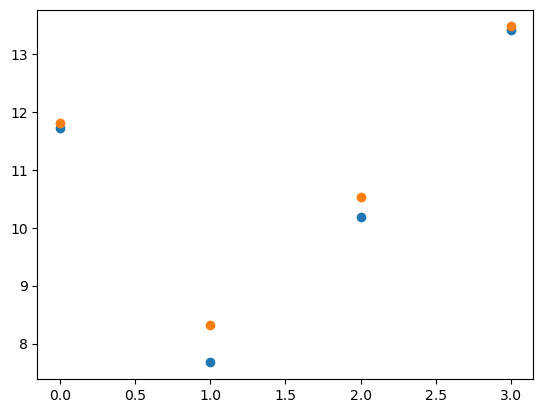

In [80]:
plt.scatter([0,1,2,3], [np.nanmean(winters_mab_gl), np.nanmean(springs_mab_gl), np.nanmean(summers_mab_gl), np.nanmean(autumns_mab_gl)])
plt.scatter([0,1,2,3], [np.nanmean(winters_mab_m6), np.nanmean(springs_mab_m6), np.nanmean(summers_mab_m6), np.nanmean(autumns_mab_m6)])

In [81]:
fig, ax = plt.subplots(
plt.plot(mab_m6.mean(['lat','lon']).groupby('time.month').mean('time').tob)
plt.plot(mab_gl.mean(['latitude','longitude']).groupby('time.month').mean('time'))

SyntaxError: '(' was never closed (2080218672.py, line 1)

In [ ]:
plt.plot(springs_mab_gl - np.nanmean(springs_mab_gl))

# MAB EPU

In [ ]:
annual_anom_mab_gl = mab_gl.mean(['latitude','longitude']).groupby('time.year').mean('time') - mab_gl.mean()
annual_anom_mab_m6 = mab_m6.mean(['lat','lon']).groupby('time.year').mean('time') - mab_m6.mean()

In [ ]:
fig, ax = plt.subplots(figsize = [10, 10])
ax.plot(annual_anom_mab_gl.year, annual_anom_mab_gl.bottomT, color = 'k')
ax.scatter(annual_anom_mab_gl.year, annual_anom_mab_gl.bottomT, color = 'k', label = 'Glorys')
ax.plot(annual_anom_mab_m6.year, annual_anom_mab_m6.tob, color = 'k', linestyle = 'dashed')
ax.scatter(annual_anom_mab_m6.year, annual_anom_mab_m6.tob, color = 'k', marker = 'o', facecolor = 'none', label = 'MOM6')

plt.legend()
plt.title('MAB Annual', fontsize = 14)
plt.ylabel('Temperature Anomaly Deg C', fontsize = 12)

In [ ]:
seasonal_avgs_mab_m6

In [ ]:
seasonal_avgs_mab_m6 = mab_m6.mean(['lat','lon']).resample(time = 'QE-JAN').mean()
seasonal_avgs_mab_gl = mab_gl.mean(['latitude','longitude']).resample(time = 'QE-JAN').mean()

In [ ]:
len(springs_mab_gl)

In [26]:
winters_mab_m6 = seasonal_avgs_mab_m6.tob[np.arange(0,109, 4)]
springs_mab_m6 = seasonal_avgs_mab_m6.tob[np.arange(1,109, 4)]
summers_mab_m6 = seasonal_avgs_mab_m6.tob[np.arange(2,109, 4)]
autumns_mab_m6 = seasonal_avgs_mab_m6.tob[np.arange(3,109, 4)]

winters_mab_gl = seasonal_avgs_mab_gl.bottomT[np.arange(0,115, 4)]
springs_mab_gl = seasonal_avgs_mab_gl.bottomT[np.arange(1,115, 4)]
summers_mab_gl = seasonal_avgs_mab_gl.bottomT[np.arange(2,115, 4)]
autumns_mab_gl = seasonal_avgs_mab_gl.bottomT[np.arange(3,115, 4)]

<>:55: SyntaxWarning: invalid escape sequence '\c'
<>:55: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Laura.Gruenburg\AppData\Local\Temp\1\ipykernel_29604\2231760303.py:55: SyntaxWarning: invalid escape sequence '\c'
  ax[0,0].set_ylabel('Bottom Temperature Anomaly ($^\circ$C)', fontsize = 12)


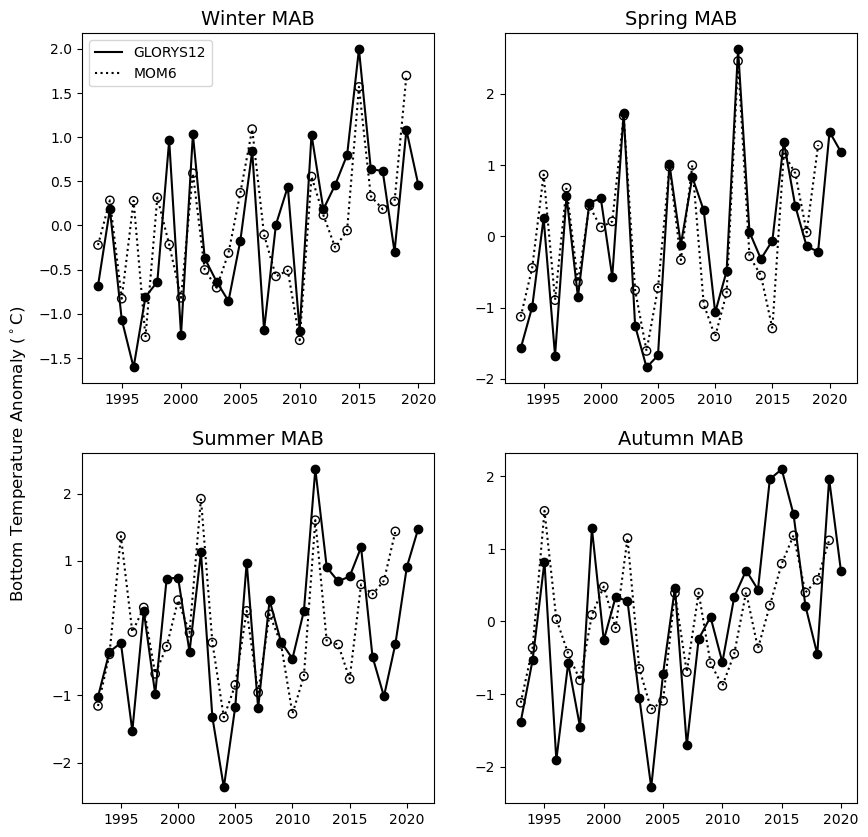

In [27]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = [10,10])

ax[0,0].plot(np.arange(1993, 2021), winters_mab_gl[1:] - np.nanmean(winters_mab_gl[1:]), c = 'k', label = 'GLORYS12')
ax[0,0].scatter(np.arange(1993, 2021), winters_mab_gl[1:] - np.nanmean(winters_mab_gl[1:]), c = 'k')
ax[0,0].plot(np.arange(1993, 2020), winters_mab_m6[1:] - np.nanmean(winters_mab_m6[1:]), c = 'k', linestyle = ':', label = 'MOM6')
ax[0,0].scatter(np.arange(1993, 2020), winters_mab_m6[1:] - np.nanmean(winters_mab_m6[1:]),facecolor = 'none', edgecolor = 'k')
ax[0,0].set_title('Winter MAB', fontsize = 14)

ax[0,1].plot(np.arange(1993, 2022), springs_mab_gl - np.nanmean(springs_mab_gl), c = 'k')
ax[0,1].scatter(np.arange(1993, 2022), springs_mab_gl - np.nanmean(springs_mab_gl), c = 'k')
ax[0,1].plot(np.arange(1993, 2020), springs_mab_m6 - np.nanmean(springs_mab_m6), c = 'k', linestyle = ':')
ax[0,1].scatter(np.arange(1993, 2020), springs_mab_m6 - np.nanmean(springs_mab_m6),facecolor = 'none', edgecolor = 'k')
ax[0,1].set_title('Spring MAB', fontsize = 14)

ax[1,0].plot(np.arange(1993, 2022), summers_mab_gl - np.nanmean(summers_mab_gl), c = 'k')
ax[1,0].scatter(np.arange(1993, 2022), summers_mab_gl - np.nanmean(summers_mab_gl), c = 'k')
ax[1,0].plot(np.arange(1993, 2020), summers_mab_m6 - np.nanmean(summers_mab_m6), c = 'k', linestyle = ':')
ax[1,0].scatter(np.arange(1993, 2020), summers_mab_m6 - np.nanmean(summers_mab_m6),facecolor = 'none', edgecolor = 'k')
ax[1,0].set_title('Summer MAB', fontsize = 14)

ax[1,1].plot(np.arange(1993, 2021), autumns_mab_gl - np.nanmean(autumns_mab_gl), c = 'k')
ax[1,1].scatter(np.arange(1993, 2021), autumns_mab_gl - np.nanmean(autumns_mab_gl), c = 'k')
ax[1,1].plot(np.arange(1993, 2020), autumns_mab_m6 - np.nanmean(autumns_mab_m6), c = 'k', linestyle = ':')
ax[1,1].scatter(np.arange(1993, 2020), autumns_mab_m6 - np.nanmean(autumns_mab_m6),facecolor = 'none', edgecolor = 'k')
ax[1,1].set_title('Autumn MAB', fontsize = 14)

ax[0,0].legend(loc='upper left')
ax[0,0].set_ylabel('Bottom Temperature Anomaly ($^\circ$C)', fontsize = 12)
ax[0,0].yaxis.set_label_coords(-0.15,-0.2)

In [82]:
forecast_december = xr.open_dataset('C:/Users/Laura.Gruenburg/Desktop/Projects/MOM6_Validation/tob_forecast/Dec_init/tob_forecast_i201712.nc')
forecast_march = xr.open_dataset('C:/Users/Laura.Gruenburg/Desktop/Projects/MOM6_Validation/tob_forecast/March_init/tob_forecast_i201803.nc')
forecast_june = xr.open_dataset('C:/Users/Laura.Gruenburg/Desktop/Projects/MOM6_Validation/tob_forecast/June_init/tob_forecast_i201806.nc')
forecast_september = xr.open_dataset('C:/Users/Laura.Gruenburg/Desktop/Projects/MOM6_Validation/tob_forecast/Sept_init/tob_forecast_i201809.nc')

forecast_december_mab = reupy.crop_nd(forecast_december, 'lon', 'lat', mab)
forecast_march_mab = reupy.crop_nd(forecast_march, 'lon', 'lat', mab)
forecast_june_mab = reupy.crop_nd(forecast_june, 'lon', 'lat', mab)
forecast_september_mab = reupy.crop_nd(forecast_september, 'lon', 'lat', mab)

In [29]:
forecast_december

<xarray.Dataset>
Dimensions:   (lead: 12, member: 10, lon: 774, lat: 844)
Coordinates:
    init      datetime64[ns] 2017-12-01
  * lead      (lead) int32 0 1 2 3 4 5 6 7 8 9 10 11
  * member    (member) int32 1 2 3 4 5 6 7 8 9 10
    month     int32 12
  * lon       (lon) float64 261.6 261.6 261.7 261.8 ... 323.7 323.8 323.8 323.9
  * lat       (lat) float64 5.273 5.335 5.398 5.461 ... 57.97 58.04 58.1 58.16
Data variables:
    tob       (member, lead, lat, lon) float32 ...
    tob_anom  (member, lead, lat, lon) float32 ...
Attributes:
    NumFilesInSet:    1
    title:            NWA12_forecast_2023-04_1994-12-e01
    grid_type:        regular
    grid_tile:        N/A
    history:          Derived and written at NOAA Physical Science Laboratory
    NCO:              netCDF Operators version 5.1.5 (Homepage = http://nco.s...
    contact:          chia-wei.hsu@noaa.gov
    dataset:          regional mom6 regrid
    paper_reference:  https://doi.org/10.5194/egusphere-2024-394
    data_reference:   https://doi.org/10.5281/zenodo.10642294

In [83]:
winter_forecast_december_mab = forecast_december_mab.sel(lead = slice(1,3))
spring_forecast_december_mab = forecast_december_mab.sel(lead = slice(4,6))
summer_forecast_december_mab = forecast_december_mab.sel(lead = slice(7,9))


spring_forecast_march_mab = forecast_march_mab.sel(lead = slice(1,3))
summer_forecast_march_mab = forecast_march_mab.sel(lead = slice(4,6))
autumn_forecast_march_mab = forecast_march_mab.sel(lead = slice(7,9))

winter_forecast_june_mab = forecast_june_mab.sel(lead = slice(1,3))
autumn_forecast_june_mab = forecast_june_mab.sel(lead = slice(4,6))
summer_forecast_june_mab = forecast_june_mab.sel(lead = slice(7,9))

In [84]:
spr_march = spring_forecast_march_mab.mean(['lat','lon','lead','member'])
sum_march = summer_forecast_march_mab.mean(['lat','lon','lead','member'])
aut_march = autumn_forecast_march_mab.mean(['lat','lon','lead','member'])

In [85]:
seasonal_clim_mab_m6 = np.empty(109)
seasonal_clim_mab_m6[np.arange(0,109,4)] = np.nanmean(winters_mab_m6)
seasonal_clim_mab_m6[np.arange(1,109,4)] = np.nanmean(springs_mab_m6)
seasonal_clim_mab_m6[np.arange(2,109,4)] = np.nanmean(summers_mab_m6)
seasonal_clim_mab_m6[np.arange(3,109,4)] = np.nanmean(autumns_mab_m6)
seasonal_anoms_mab_m6 = seasonal_avgs_mab_m6 - seasonal_clim_mab_m6

In [86]:
seasonal_clim_mab_gl = np.empty(115)
seasonal_clim_mab_gl[np.arange(0,115,4)] = np.nanmean(winters_mab_gl)
seasonal_clim_mab_gl[np.arange(1,115,4)] = np.nanmean(springs_mab_gl)
seasonal_clim_mab_gl[np.arange(2,115,4)] = np.nanmean(summers_mab_gl)
seasonal_clim_mab_gl[np.arange(3,115,4)] = np.nanmean(autumns_mab_gl)
seasonal_anoms_mab_gl = seasonal_avgs_mab_gl - seasonal_clim_mab_gl

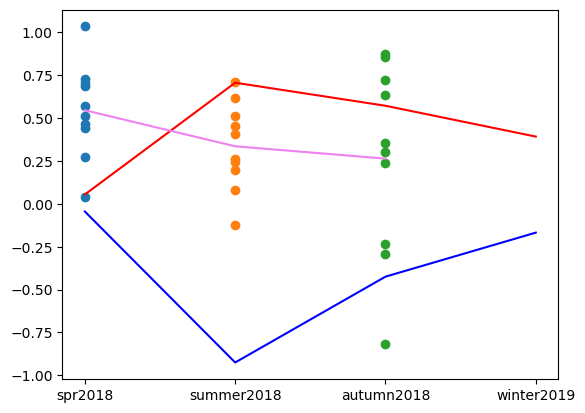

In [240]:
plt.plot(['spr2018','summer2018','autumn2018','winter2019'], seasonal_anoms_mab_m6.tob.sel(time = slice('2018-03','2019-03')), c= 'r')
plt.plot(['spr2018','summer2018','autumn2018','winter2019'], seasonal_anoms_mab_gl.bottomT.sel(time = slice('2018-03','2019-02')),c= 'b')
plt.plot(['spr2018','summer2018','autumn2018'],[spr_march.tob_anom, sum_march.tob_anom,aut_march.tob_anom],c= 'violet')
plt.scatter(['spr2018','spr2018','spr2018','spr2018','spr2018','spr2018','spr2018','spr2018','spr2018','spr2018'],spring_forecast_march_mab.mean(['lat','lon','lead']).tob_anom)
plt.scatter(['summer2018','summer2018','summer2018','summer2018','summer2018','summer2018','summer2018','summer2018','summer2018','summer2018'],summer_forecast_march_mab.mean(['lat','lon','lead']).tob_anom)
plt.scatter(['autumn2018','autumn2018','autumn2018','autumn2018','autumn2018','autumn2018','autumn2018','autumn2018','autumn2018','autumn2018'],autumn_forecast_march_mab.mean(['lat','lon','lead']).tob_anom)

In [ ]:
seasonal_anoms_mab_m6.tob.sel(time = slice('2018-03','2019-03'))

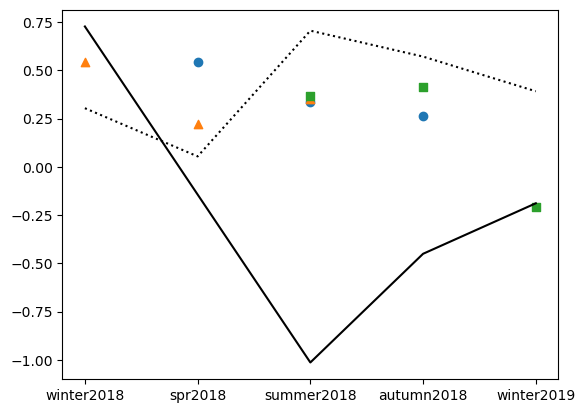

In [43]:
plt.plot(['winter2018','spr2018','summer2018','autumn2018','winter2019'], seasonal_anoms_mab_m6.tob.sel(time = slice('2018-01','2019-03')), color = 'k', linestyle = ':')
plt.plot(['winter2018','spr2018','summer2018','autumn2018','winter2019'], seasonal_anoms_mab_gl.bottomT.sel(time = slice('2018-01','2019-02')), color = 'k')
#plt.plot(['spr2018','summer2018','autumn2018'],[spr_march.tob_anom, sum_march.tob_anom,aut_march.tob_anom])
plt.scatter(['spr2018','summer2018','autumn2018'],[spr_march.tob_anom, sum_march.tob_anom,aut_march.tob_anom],marker = 'o')
plt.scatter(['winter2018','spr2018','summer2018'],[winter_forecast_december_mab.tob_anom.mean(['lat','lon','lead','member']),
                                                           spring_forecast_december_mab.tob_anom.mean(['lat','lon','lead','member']),
                                                           summer_forecast_december_mab.tob_anom.mean(['lat','lon','lead','member'])], marker = '^')
plt.scatter(['summer2018', 'autumn2018','winter2019'],[summer_forecast_june_mab.tob_anom.mean(['lat','lon','lead','member']),
                                                           autumn_forecast_june_mab.tob_anom.mean(['lat','lon','lead','member']),
                                                           winter_forecast_june_mab.tob_anom.mean(['lat','lon','lead','member'])], marker = 's')
                                                                                                                      

In [93]:
tob_month = xr.open_dataset( "C:/Users/Laura.Gruenburg/Desktop/Projects/MOM6_Validation/tob_forecast/March_init/tob_forecast_i199303.nc")
tob_month_crop = tob_month.sel(lat = slice(30,48), lon = slice(260, 300)) 
dt = datetime.strptime('199303', '%Y%m')
dates = pn.date_range(dt, str(dt.year +1) + '-2', freq = 'MS')
march_forecast = xr.Dataset(data_vars = {'tob': (['member','date','lat','lon'], tob_month_crop.tob.data),
                                          'tob_anom': (['member','date','lat','lon'], tob_month_crop.tob_anom.data)},
                             coords = {'member': tob_month_crop.member.values,
                                       'date': dates,
                                       'lat': tob_month_crop.lat.values,
                                       'lon': tob_month_crop.lon.values})
                                 

In [94]:
march_forecast

<xarray.Dataset>
Dimensions:   (member: 10, date: 12, lat: 287, lon: 477)
Coordinates:
  * member    (member) int32 1 2 3 4 5 6 7 8 9 10
  * date      (date) datetime64[ns] 1993-03-01 1993-04-01 ... 1994-02-01
  * lat       (lat) float64 30.05 30.12 30.18 30.24 ... 47.81 47.87 47.93 48.0
  * lon       (lon) float64 261.6 261.6 261.7 261.8 ... 299.7 299.8 299.9 300.0
Data variables:
    tob       (member, date, lat, lon) float32 nan nan nan ... 5.365 5.358 5.351
    tob_anom  (member, date, lat, lon) float32 nan nan nan ... -0.4038 -0.4128

In [95]:
# Assign directory
directory = "C:/Users/Laura.Gruenburg/Desktop/Projects/MOM6_Validation/tob_forecast/March_init/"

# Iterate over files in directory
for file in os.listdir(directory):
    filename = directory + file
    tob_month = xr.open_dataset(directory + file)
    tob_month_crop = tob_month.sel(lat = slice(30,48), lon = slice(260, 300)) 
    dt = datetime.strptime(file[14:20], '%Y%m')
    dates = pn.date_range(dt, str(dt.year + 1) + '-2', freq = 'MS')
    new_forecast_ds = xr.Dataset(data_vars = {'tob': (['member','date','lat','lon'], tob_month_crop.tob.data),
                                          'tob_anom': (['member','date','lat','lon'], tob_month_crop.tob_anom.data)},
                             coords = {'member': tob_month_crop.member.values,
                                       'date': dates,
                                       'lat': tob_month_crop.lat.values,
                                       'lon': tob_month_crop.lon.values})
    march_forecast = xr.merge([march_forecast, new_forecast_ds])

In [96]:
march_forecast_crop = reupy.crop_nd(march_forecast, 'lon', 'lat', mab)

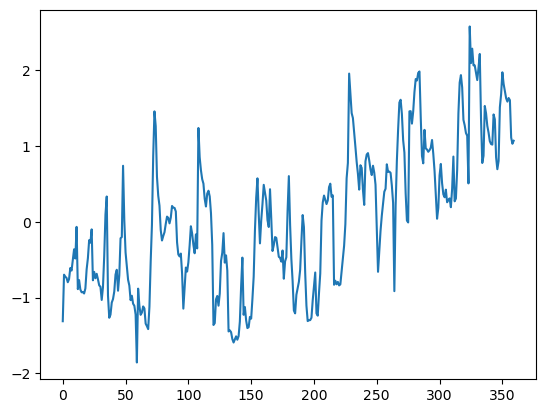

In [104]:
plt.plot(march_forecast_crop.mean(['lat','lon','member']).tob_anom)

In [105]:
#remove everything except april-june
def is_spring(month):
    return (month >= 4) & (month <= 6)

march_forecast_spring = march_forecast_crop.sel(date=is_spring(march_forecast_crop['date.month']))

In [113]:
#remove everything except july-sept
def is_summer(month):
    return (month >= 7) & (month <= 9)

march_forecast_summer = march_forecast_crop.sel(date=is_summer(march_forecast_crop['date.month']))

In [106]:
march_forecast_mab_sp = march_forecast_spring.groupby('date.year').mean(['date','lat','lon'])

In [114]:
march_forecast_mab_su = march_forecast_summer.groupby('date.year').mean(['date','lat','lon'])

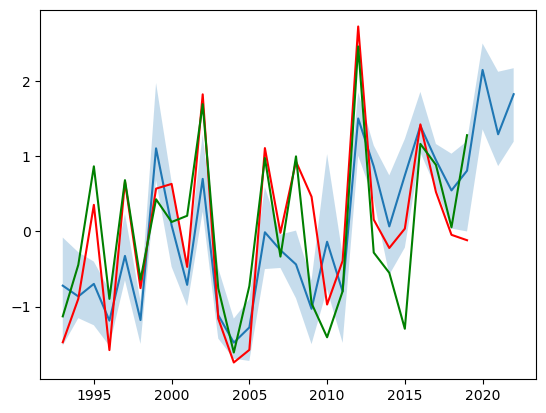

In [112]:
plt.plot(march_forecast_mab_sp.year, march_forecast_mab_sp.mean('member').tob_anom)
plt.fill_between(march_forecast_mab_sp.year, march_forecast_mab_sp.tob_anom.max('member'),
                 march_forecast_mab_sp.tob_anom.min('member'), alpha =0.25)
plt.plot(np.arange(1993, 2020), springs_mab_gl - np.nanmean(springs_mab_gl), 'r')
plt.plot(np.arange(1993, 2020), springs_mab_m6 - np.nanmean(springs_mab_m6), 'g')

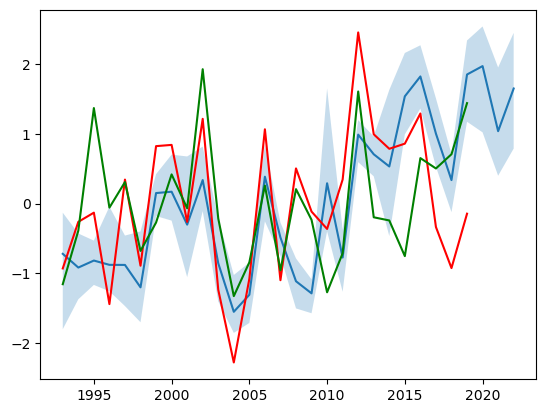

In [115]:
plt.plot(march_forecast_mab_su.year, march_forecast_mab_su.mean('member').tob_anom)
plt.fill_between(march_forecast_mab_su.year, march_forecast_mab_su.tob_anom.max('member'),
                 march_forecast_mab_su.tob_anom.min('member'), alpha =0.25)
plt.plot(np.arange(1993, 2020), summers_mab_gl - np.nanmean(summers_mab_gl), 'r')
plt.plot(np.arange(1993, 2020), summers_mab_m6 - np.nanmean(summers_mab_m6), 'g')

In [36]:
dates

DatetimeIndex(['2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01',
               '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01',
               '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01'],
              dtype='datetime64[ns]', freq='MS')

In [43]:
forecast_crop = forecast_march.sel(lat = slice(30,48), lon = slice(260, 300)) 

In [45]:
forecast_crop.tob_anom

<xarray.DataArray 'tob_anom' (member: 10, lead: 12, lat: 287, lon: 477)>
[16427880 values with dtype=float32]
Coordinates:
    init     datetime64[ns] 2018-03-01
  * lead     (lead) int32 0 1 2 3 4 5 6 7 8 9 10 11
  * member   (member) int32 1 2 3 4 5 6 7 8 9 10
    month    int32 3
  * lon      (lon) float64 261.6 261.6 261.7 261.8 ... 299.7 299.8 299.9 300.0
  * lat      (lat) float64 30.05 30.12 30.18 30.24 ... 47.81 47.87 47.93 48.0

In [63]:
new_forecast_ds = xr.Dataset(data_vars = {'tob': (['member','date','lat','lon'], forecast_crop.tob_anom.data),
                                          'tob_anom': (['member','date','lat','lon'], forecast_crop.tob_anom.data)},
                             coords = {'member': forecast_crop.member.values,
                                       'date': dates,
                                       'lat': forecast_crop.lat.values,
                                       'lon': forecast_crop.lon.values})

NameError: name 'forecast_crop' is not defined

In [49]:
new_forecast_ds

<xarray.Dataset>
Dimensions:   (member: 10, date: 12, lat: 287, lon: 477)
Coordinates:
  * member    (member) int32 1 2 3 4 5 6 7 8 9 10
  * date      (date) datetime64[ns] 2022-03-01 2022-04-01 ... 2023-02-01
  * lat       (lat) float64 30.05 30.12 30.18 30.24 ... 47.81 47.87 47.93 48.0
  * lon       (lon) float64 261.6 261.6 261.7 261.8 ... 299.7 299.8 299.9 300.0
Data variables:
    tob       (member, date, lat, lon) float32 nan nan nan ... 0.3191 0.3336
    tob_anom  (member, date, lat, lon) float32 nan nan nan ... 0.3191 0.3336

# Bottom Temperature for the state of the ecosystem

In [13]:
# Assign directory
directory = "C:/Users/Laura.Gruenburg/Desktop/Projects/MOM6_Validation/bt_hubert/bt_revised_metadata_032024/"

bt = xr.open_dataset(directory + 'bottom_temp_1959.nc')

# Iterate over files in directory
for file in os.listdir(directory):
    filename = directory + file
    bt_yr = xr.open_dataset(directory + file)
    bt = xr.merge([bt, bt_yr])

In [14]:
bt_monthly = bt.resample(time = 'MS').mean()

In [16]:
bt_monthly

<xarray.Dataset>
Dimensions:                             (latitude: 103, longitude: 123,
                                         time: 745)
Coordinates:
  * latitude                            (latitude) float64 35.92 36.0 ... 44.42
  * longitude                           (longitude) float64 -75.92 ... -65.75
  * time                                (time) datetime64[ns] 1959-01-01 ... ...
Data variables:
    sea_water_temperature_at_sea_floor  (time, latitude, longitude) float32 n...
Attributes: (12/52)
    title:                           Bottom temperature product for the north...
    summary:                         Two ocean products are combined, a regio...
    keywords:                        bottom temperature; northeast U.S. conti...
    Conventions:                     CF-1.7, ACDD-1.3
    uuid:                            8fbe86b8-8d1e-11ed-a1eb-0242ac120002
    source:                          GLORYS12V1 and ROM-NWA
    ...                              ...
    time_coverage_duration:          P1Y0M0DT0H0M0S
    time_coverage_resolution:        24:00:00
    date_created:                    2023-01-09T10:12:00
    date_modified:                   2023-01-09T10:12:00
    date_issued:                     2023-01-09T10:12:00
    date_metadata_modified:          2023-01-09T10:12:00

In [114]:
# crop to region of interest
mab_hp = reupy.crop_nd(bt_monthly, 'longitude', 'latitude', mab)
gom_hp = reupy.crop_nd(bt_monthly, 'longitude', 'latitude', gom)
ss_hp = reupy.crop_nd(bt_monthly, 'longitude', 'latitude', ss)
gb_hp = reupy.crop_nd(bt_monthly, 'longitude', 'latitude', gb)

In [217]:
# Just the debiased roms
mab_hp_roms = mab_hp.sel(time = slice('1959-01-01', '1992-12-31'))
ss_hp_roms = ss_hp.sel(time = slice('1959-01-01', '1992-12-31'))
gb_hp_roms = gb_hp.sel(time = slice('1959-01-01', '1992-12-31'))
gom_hp_roms = gom_hp.sel(time = slice('1959-01-01', '1992-12-31'))

In [218]:
#average in lat/lon space
mab_hp_ts = mab_hp_roms.mean(['latitude','longitude'])
ss_hp_ts = ss_hp_roms.mean(['latitude','longitude'])
gb_hp_ts = gb_hp_roms.mean(['latitude','longitude'])
gom_hp_ts = gom_hp_roms.mean(['latitude','longitude'])

In [219]:
# make the temperature variable named the same thing as in the model
mab_hp_ts['tob'] = mab_hp_ts.sea_water_temperature_at_sea_floor
mab_hp_ts = mab_hp_ts.drop(['sea_water_temperature_at_sea_floor'])

ss_hp_ts['tob'] = ss_hp_ts.sea_water_temperature_at_sea_floor
ss_hp_ts = ss_hp_ts.drop(['sea_water_temperature_at_sea_floor'])

gb_hp_ts['tob'] = gb_hp_ts.sea_water_temperature_at_sea_floor
gb_hp_ts = gb_hp_ts.drop(['sea_water_temperature_at_sea_floor'])

gom_hp_ts['tob'] = gom_hp_ts.sea_water_temperature_at_sea_floor
gom_hp_ts = gom_hp_ts.drop(['sea_water_temperature_at_sea_floor'])

In [220]:
# average the model data in lat/lon space
mab_m6_ts = mab_m6.mean(['lat','lon'])
ss_m6_ts = ss_m6.mean(['lat','lon'])
gom_m6_ts = gom_m6.mean(['lat','lon'])
gb_m6_ts = gb_m6.mean(['lat','lon'])

In [324]:
# merger the two datasets
mab_hp_m6_ts = xr.merge([mab_hp_ts, mab_m6_ts])
ss_hp_m6_ts = xr.merge([ss_hp_ts, ss_m6_ts])
gb_hp_m6_ts = xr.merge([gb_hp_ts, gb_m6_ts])
gom_hp_m6_ts = xr.merge([gom_hp_ts, gom_m6_ts])

In [325]:
# annual_averages
mab_m6_ts_annual = mab_m6_ts.groupby('time.year').mean('time')
gb_m6_ts_annual = gb_m6_ts.groupby('time.year').mean('time')
ss_m6_ts_annual = ss_m6_ts.groupby('time.year').mean('time')
gom_m6_ts_annual = gom_m6_ts.groupby('time.year').mean('time')

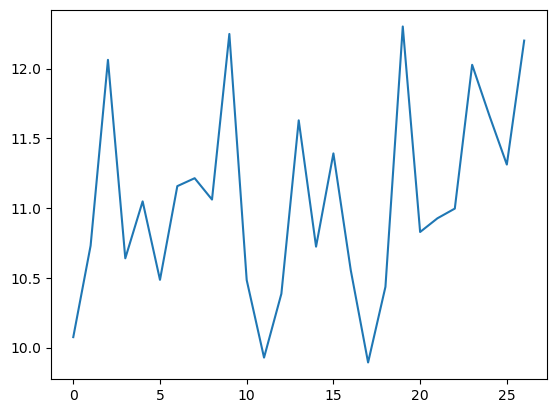

In [326]:
plt.plot(mab_m6_ts_annual.tob)

In [327]:
seasonal_avg_mab_hp_m6_ts = mab_hp_m6_ts.resample(time = 'QS-JAN').mean()
winters_mab_hp_m6_ts = seasonal_avg_mab_hp_m6_ts.tob[np.arange(0,244,4)]
springs_mab_hp_m6_ts = seasonal_avg_mab_hp_m6_ts.tob[np.arange(1,244,4)]
summers_mab_hp_m6_ts = seasonal_avg_mab_hp_m6_ts.tob[np.arange(2,244,4)]
falls_mab_hp_m6_ts = seasonal_avg_mab_hp_m6_ts.tob[np.arange(3,244,4)]

In [328]:
seasonal_avg_ss_hp_m6_ts = ss_hp_m6_ts.resample(time = 'QS-JAN').mean()
winters_ss_hp_m6_ts = seasonal_avg_ss_hp_m6_ts.tob[np.arange(0,244,4)]
springs_ss_hp_m6_ts = seasonal_avg_ss_hp_m6_ts.tob[np.arange(1,244,4)]
summers_ss_hp_m6_ts = seasonal_avg_ss_hp_m6_ts.tob[np.arange(2,244,4)]
falls_ss_hp_m6_ts = seasonal_avg_ss_hp_m6_ts.tob[np.arange(3,244,4)]

In [329]:
seasonal_avg_gb_hp_m6_ts = gb_hp_m6_ts.resample(time = 'QS-JAN').mean()
winters_gb_hp_m6_ts = seasonal_avg_gb_hp_m6_ts.tob[np.arange(0,244,4)]
springs_gb_hp_m6_ts = seasonal_avg_gb_hp_m6_ts.tob[np.arange(1,244,4)]
summers_gb_hp_m6_ts = seasonal_avg_gb_hp_m6_ts.tob[np.arange(2,244,4)]
falls_gb_hp_m6_ts = seasonal_avg_gb_hp_m6_ts.tob[np.arange(3,244,4)]

In [330]:
seasonal_avg_gom_hp_m6_ts = gom_hp_m6_ts.resample(time = 'QS-JAN').mean()
winters_gom_hp_m6_ts = seasonal_avg_gom_hp_m6_ts.tob[np.arange(0,244,4)]
springs_gom_hp_m6_ts = seasonal_avg_gom_hp_m6_ts.tob[np.arange(1,244,4)]
summers_gom_hp_m6_ts = seasonal_avg_gom_hp_m6_ts.tob[np.arange(2,244,4)]
falls_gom_hp_m6_ts = seasonal_avg_gom_hp_m6_ts.tob[np.arange(3,244,4)]

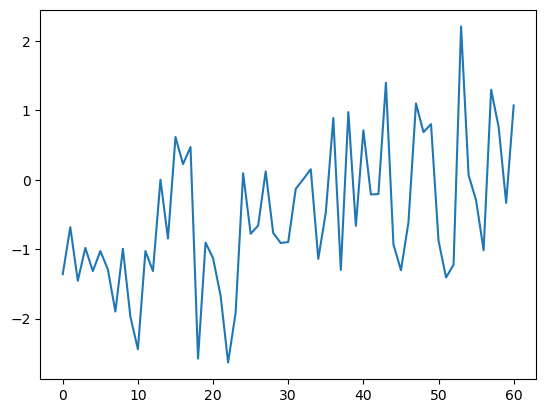

In [331]:
plt.plot(winters_mab_hp_m6_ts - winters_mab_hp_m6_ts.sel(time = slice('1990-01-01', '2020-12-31')).mean())

In [332]:
len(pn.to_datetime(winters_mab_hp_m6_ts.time).year)

61

In [333]:
BT = pn.DataFrame(data = {'Time': pn.to_datetime(winters_mab_hp_m6_ts.time).year,
                            'Value': winters_mab_hp_m6_ts - winters_mab_hp_m6_ts.sel(time = slice('1990-01-01', '2020-12-31')).mean(),
                            'EPU': ['MAB']*61,
                            'Source': ['ROMS']*61,
                            'Var': ['Winter bottom temp anomaly roms_mom6']*61,
                            'Units': ['degrees C']*61})

BTss = pn.DataFrame(data = {'Time': pn.to_datetime(winters_ss_hp_m6_ts.time).year,
                            'Value': winters_ss_hp_m6_ts - winters_ss_hp_m6_ts.sel(time = slice('1990-01-01', '2020-12-31')).mean(),
                            'EPU': ['SS']*61,
                            'Source': ['ROMS']*61,
                            'Var': ['Winter bottom temp anomaly roms_mom6']*61,
                            'Units': ['degrees C']*61})

BTgb = pn.DataFrame(data = {'Time': pn.to_datetime(winters_gb_hp_m6_ts.time).year,
                            'Value': winters_gb_hp_m6_ts - winters_gb_hp_m6_ts.sel(time = slice('1990-01-01', '2020-12-31')).mean(),
                            'EPU': ['GB']*61,
                            'Source': ['ROMS']*61,
                            'Var': ['Winter bottom temp anomaly roms_mom6']*61,
                            'Units': ['degrees C']*61})

BTgom = pn.DataFrame(data = {'Time': pn.to_datetime(winters_gom_hp_m6_ts.time).year,
                            'Value': winters_gom_hp_m6_ts - winters_gom_hp_m6_ts.sel(time = slice('1990-01-01', '2020-12-31')).mean(),
                            'EPU': ['GOM']*61,
                            'Source': ['ROMS']*61,
                            'Var': ['Winter bottom temp anomaly roms_mom6']*61,
                            'Units': ['degrees C']*61})

In [334]:
BT['Source'][np.where(BT.Time >=1993)] = 'MOM6'
BTss['Source'][np.where(BTss.Time >=1993)] = 'MOM6'
BTgb['Source'][np.where(BTgb.Time>=1993)] = 'MOM6'
BTgom['Source'][np.where(BTgom.Time>=1993)] = 'MOM6'

C:\Users\Laura.Gruenburg\AppData\Local\Temp\1\ipykernel_3656\3672332673.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  BT['Source'][np.where(BT.Time >=1993)] = 'MOM6'
C:\Users\Laura.Gruenburg\AppData\Local\Temp\1\ipykernel_3656\36723326

In [335]:
BT_sp = pn.DataFrame(data = {'Time': pn.to_datetime(springs_mab_hp_m6_ts.time).year,
                            'Value': springs_mab_hp_m6_ts - springs_mab_hp_m6_ts.sel(time = slice('1990-01-01', '2020-12-31')).mean(),
                            'EPU': ['MAB']*61,
                            'Source': ['ROMS']*61,
                            'Var': ['Spring bottom temp anomaly roms_mom6']*61,
                            'Units': ['degrees C']*61})
BT_sp['Source'][np.where(BT_sp.Time >=1993)] = 'MOM6'

BT_spss = pn.DataFrame(data = {'Time': pn.to_datetime(springs_ss_hp_m6_ts.time).year,
                            'Value': springs_ss_hp_m6_ts - springs_ss_hp_m6_ts.sel(time = slice('1990-01-01', '2020-12-31')).mean(),
                            'EPU': ['SS']*61,
                            'Source': ['ROMS']*61,
                            'Var': ['Spring bottom temp anomaly roms_mom6']*61,
                            'Units': ['degrees C']*61})
BT_spss['Source'][np.where(BT_spss.Time >=1993)] = 'MOM6'

BT_spgb = pn.DataFrame(data = {'Time': pn.to_datetime(springs_gb_hp_m6_ts.time).year,
                            'Value': springs_gb_hp_m6_ts - springs_gb_hp_m6_ts.sel(time = slice('1990-01-01', '2020-12-31')).mean(),
                            'EPU': ['GB']*61,
                            'Source': ['ROMS']*61,
                            'Var': ['Spring bottom temp anomaly roms_mom6']*61,
                            'Units': ['degrees C']*61})
BT_spgb['Source'][np.where(BT_spgb.Time >=1993)] = 'MOM6'

BT_spgom = pn.DataFrame(data = {'Time': pn.to_datetime(springs_gom_hp_m6_ts.time).year,
                            'Value': springs_gom_hp_m6_ts - springs_gom_hp_m6_ts.sel(time = slice('1990-01-01', '2020-12-31')).mean(),
                            'EPU': ['GOM']*61,
                            'Source': ['ROMS']*61,
                            'Var': ['Spring bottom temp anomaly roms_mom6']*61,
                            'Units': ['degrees C']*61})
BT_spgom['Source'][np.where(BT_spss.Time >=1993)] = 'MOM6'

C:\Users\Laura.Gruenburg\AppData\Local\Temp\1\ipykernel_3656\2684411526.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  BT_sp['Source'][np.where(BT_sp.Time >=1993)] = 'MOM6'
C:\Users\Laura.Gruenburg\AppData\Local\Temp\1\ipykernel_3656\26

In [336]:
BT_su = pn.DataFrame(data = {'Time': pn.to_datetime(summers_mab_hp_m6_ts.time).year,
                            'Value': summers_mab_hp_m6_ts - summers_mab_hp_m6_ts.sel(time = slice('1990-01-01', '2020-12-31')).mean(),
                            'EPU': ['MAB']*61,
                            'Source': ['ROMS']*61,
                            'Var': ['Summer bottom temp anomaly roms_mom6']*61,
                            'Units': ['degrees C']*61})
BT_su['Source'][np.where(BT_su.Time >=1993)] = 'MOM6'

BT_suss = pn.DataFrame(data = {'Time': pn.to_datetime(summers_ss_hp_m6_ts.time).year,
                            'Value': summers_ss_hp_m6_ts - summers_ss_hp_m6_ts.sel(time = slice('1990-01-01', '2020-12-31')).mean(),
                            'EPU': ['SS']*61,
                            'Source': ['ROMS']*61,
                            'Var': ['Summer bottom temp anomaly roms_mom6']*61,
                            'Units': ['degrees C']*61})
BT_suss['Source'][np.where(BT_suss.Time >=1993)] = 'MOM6'

BT_sugb = pn.DataFrame(data = {'Time': pn.to_datetime(summers_gb_hp_m6_ts.time).year,
                            'Value': summers_gb_hp_m6_ts - summers_gb_hp_m6_ts.sel(time = slice('1990-01-01', '2020-12-31')).mean(),
                            'EPU': ['GB']*61,
                            'Source': ['ROMS']*61,
                            'Var': ['Summer bottom temp anomaly roms_mom6']*61,
                            'Units': ['degrees C']*61})
BT_sugb['Source'][np.where(BT_sugb.Time >=1993)] = 'MOM6'

BT_sugom = pn.DataFrame(data = {'Time': pn.to_datetime(summers_gom_hp_m6_ts.time).year,
                            'Value': summers_gom_hp_m6_ts - summers_gom_hp_m6_ts.sel(time = slice('1990-01-01', '2020-12-31')).mean(),
                            'EPU': ['GOM']*61,
                            'Source': ['ROMS']*61,
                            'Var': ['Summer bottom temp anomaly roms_mom6']*61,
                            'Units': ['degrees C']*61})
BT_sugom['Source'][np.where(BT_sugom.Time >=1993)] = 'MOM6'

C:\Users\Laura.Gruenburg\AppData\Local\Temp\1\ipykernel_3656\2752865239.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  BT_su['Source'][np.where(BT_su.Time >=1993)] = 'MOM6'
C:\Users\Laura.Gruenburg\AppData\Local\Temp\1\ipykernel_3656\27

In [337]:
BT_fa = pn.DataFrame(data = {'Time': pn.to_datetime(falls_mab_hp_m6_ts.time).year,
                            'Value': falls_mab_hp_m6_ts - falls_mab_hp_m6_ts.sel(time = slice('1990-01-01', '2020-12-31')).mean(),
                            'EPU': ['MAB']*61,
                            'Source': ['ROMS']*61,
                            'Var': ['Fall bottom temp anomaly roms_mom6']*61,
                            'Units': ['degrees C']*61})
BT_fa['Source'][np.where(BT_fa.Time >=1993)] = 'MOM6'

BT_fass = pn.DataFrame(data = {'Time': pn.to_datetime(falls_ss_hp_m6_ts.time).year,
                            'Value': falls_ss_hp_m6_ts - falls_ss_hp_m6_ts.sel(time = slice('1990-01-01', '2020-12-31')).mean(),
                            'EPU': ['SS']*61,
                            'Source': ['ROMS']*61,
                            'Var': ['Fall bottom temp anomaly roms_mom6']*61,
                            'Units': ['degrees C']*61})
BT_fass['Source'][np.where(BT_fass.Time >=1993)] = 'MOM6'

BT_fagb = pn.DataFrame(data = {'Time': pn.to_datetime(falls_gb_hp_m6_ts.time).year,
                            'Value': falls_gb_hp_m6_ts - falls_gb_hp_m6_ts.sel(time = slice('1990-01-01', '2020-12-31')).mean(),
                            'EPU': ['GB']*61,
                            'Source': ['ROMS']*61,
                            'Var': ['Fall bottom temp anomaly roms_mom6']*61,
                            'Units': ['degrees C']*61})
BT_fagb['Source'][np.where(BT_fagb.Time >=1993)] = 'MOM6'

BT_fagom = pn.DataFrame(data = {'Time': pn.to_datetime(falls_gom_hp_m6_ts.time).year,
                            'Value': falls_gom_hp_m6_ts - falls_gom_hp_m6_ts.sel(time = slice('1990-01-01', '2020-12-31')).mean(),
                            'EPU': ['GOM']*61,
                            'Source': ['ROMS']*61,
                            'Var': ['Fall bottom temp anomaly roms_mom6']*61,
                            'Units': ['degrees C']*61})
BT_fagom['Source'][np.where(BT_fagom.Time >=1993)] = 'MOM6'

C:\Users\Laura.Gruenburg\AppData\Local\Temp\1\ipykernel_3656\2448290339.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  BT_fa['Source'][np.where(BT_fa.Time >=1993)] = 'MOM6'
C:\Users\Laura.Gruenburg\AppData\Local\Temp\1\ipykernel_3656\24

In [338]:
mab_m6_ts_annual

<xarray.Dataset>
Dimensions:  (year: 27)
Coordinates:
  * year     (year) int64 1993 1994 1995 1996 1997 ... 2015 2016 2017 2018 2019
Data variables:
    tob      (year) float32 10.07 10.73 12.06 10.64 ... 12.03 11.66 11.31 12.2

In [339]:
BT_mab_annual = pn.DataFrame(data = {'Time': mab_m6_ts_annual.year,
                            'Value': mab_m6_ts_annual.tob,
                            'EPU': ['MAB']*27,
                            'Source': ['MOM6']*27,
                            'Var': ['Annual_Bottom Temp']*27,
                            'Units': ['degrees C']*27})

In [340]:
BT_gb_annual = pn.DataFrame(data = {'Time': gb_m6_ts_annual.year,
                            'Value': gb_m6_ts_annual.tob,
                            'EPU': ['GB']*27,
                            'Source': ['MOM6']*27,
                            'Var': ['Annual_Bottom Temp']*27,
                            'Units': ['degrees C']*27})

In [341]:
BT_ss_annual = pn.DataFrame(data = {'Time': ss_m6_ts_annual.year,
                            'Value': ss_m6_ts_annual.tob,
                            'EPU': ['SS']*27,
                            'Source': ['MOM6']*27,
                            'Var': ['Annual_Bottom Temp']*27,
                            'Units': ['degrees C']*27})

In [342]:
BT_gom_annual = pn.DataFrame(data = {'Time': gom_m6_ts_annual.year,
                            'Value': gom_m6_ts_annual.tob,
                            'EPU': ['GOM']*27,
                            'Source': ['MOM6']*27,
                            'Var': ['Annual_Bottom Temp']*27,
                            'Units': ['degrees C']*27})

In [343]:
BT = pn.concat([BT, BT_sp, BT_su, BT_fa, 
                BTss, BT_spss, BT_suss, BT_fass, 
                BTgb, BT_spgb, BT_sugb, BT_fagb, 
                BTgom, BT_spgom, BT_sugom, BT_fagom,
                BT_mab_annual, BT_gb_annual,
                BT_ss_annual, BT_gom_annual])

In [344]:
BT.reset_index(drop = True)

,Time,Value,EPU,Source,Var,Units
0,1959,-1.359687,MAB,ROMS,Winter bottom temp anomaly roms_mom6,degrees C
1,1960,-0.683389,MAB,ROMS,Winter bottom temp anomaly roms_mom6,degrees C
2,1961,-1.455608,MAB,ROMS,Winter bottom temp anomaly roms_mom6,degrees C
3,1962,-0.981730,MAB,ROMS,Winter bottom temp anomaly roms_mom6,degrees C
4,1963,-1.316508,MAB,ROMS,Winter bottom temp anomaly roms_mom6,degrees C
...,...,...,...,...,...,...
1079,2015,6.741751,GOM,MOM6,Annual_Bottom Temp,degrees C
1080,2016,8.070062,GOM,MOM6,Annual_Bottom Temp,degrees C
1081,2017,7.517481,GOM,MOM6,Annual_Bottom Temp,degrees C
1082,2018,7.544405,GOM,MOM6,Annual_Bottom Temp,degrees C


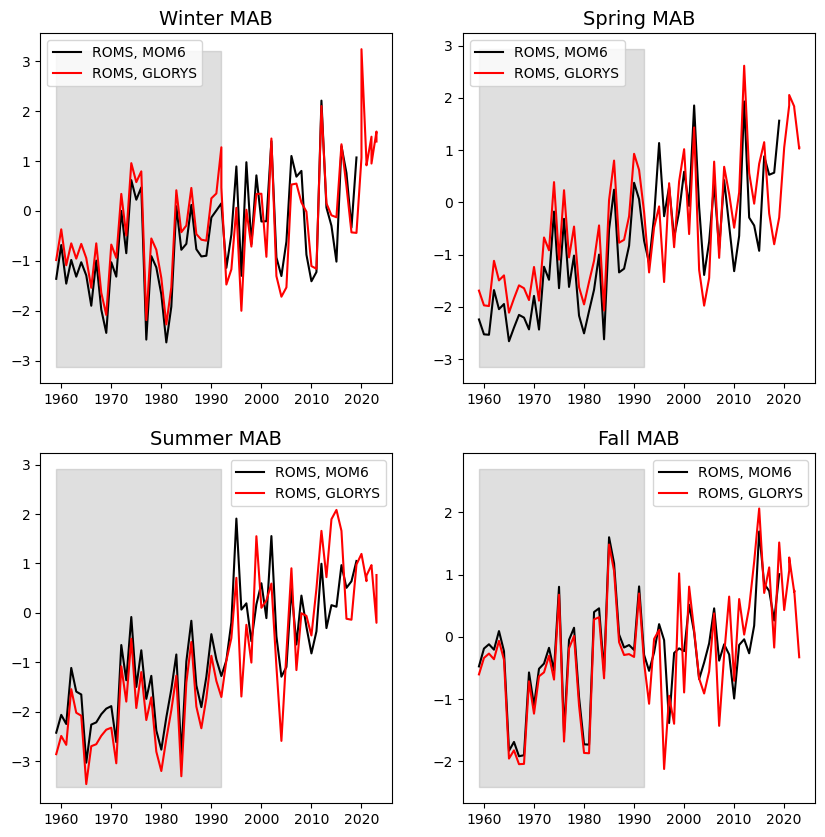

In [345]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = [10,10])

df1 = BT[(BT.Var == 'Winter bottom temp anomaly roms_mom6') & (BT.EPU == 'MAB')]
df1a = glorys_bt_ind[(glorys_bt_ind.Var == 'Winter_Bottom Temp Anomaly') & (glorys_bt_ind.EPU == 'MAB')]
df2 = BT[(BT.Var == 'Spring bottom temp anomaly roms_mom6') & (BT.EPU == 'MAB')]
df2a = glorys_bt_ind[(glorys_bt_ind.Var == 'Spring_Bottom Temp Anomaly') & (glorys_bt_ind.EPU == 'MAB')]
df3 = BT[(BT.Var == 'Summer bottom temp anomaly roms_mom6') & (BT.EPU == 'MAB')]
df3a = glorys_bt_ind[(glorys_bt_ind.Var == 'Summer_Bottom Temp Anomaly') & (glorys_bt_ind.EPU == 'MAB')]
df4 = BT[(BT.Var == 'Fall bottom temp anomaly roms_mom6') & (BT.EPU == 'MAB')]
df4a = glorys_bt_ind[(glorys_bt_ind.Var == 'Fall_Bottom Temp Anomaly') & (glorys_bt_ind.EPU == 'MAB')]


ax[0,0].plot(df1.Time, df1.Value, c = 'k', label = 'ROMS, MOM6')
#ax[0,0].scatter(df1[df1.Source == 'ROMS'].Time, df1[df1.Source == 'ROMS'].Value, c = 'k', marker = 'o', label = 'ROMS')
#ax[0,0].scatter(df1[df1.Source == 'MOM6'].Time, df1[df1.Source == 'MOM6'].Value, c = 'k', marker = '^', label = 'MOM6')
ax[0,0].plot(df1a.Time, df1a.Value, c = 'r', label = 'ROMS, GLORYS')
ax[0,0].fill_between(np.arange(1959,1993), min(df1.Value)-0.5, max(df1.Value) +1, alpha=0.25, color = 'grey')
#ax[0,0].scatter(df1a[df1a.Source == 'ROMS'].Time, df1a[df1a.Source == 'ROMS'].Value, c = 'r', marker = 'o')
#ax[0,0].scatter(df1a[df1a.Source == 'GLORYS'].Time, df1a[df1a.Source == 'GLORYS'].Value, c = 'r', marker = 's', label = 'GLORYS')
ax[0,0].set_title('Winter MAB', fontsize = 14)
ax[0,0].legend()

ax[0,1].plot(df2.Time[:61], df2.Value[:61], c = 'k', label = 'ROMS, MOM6')
ax[0,1].plot(df2a.Time, df2a.Value, c = 'r', label = 'ROMS, GLORYS')
ax[0,1].fill_between(np.arange(1959,1993), min(df2.Value)-0.5, max(df2.Value) +1, alpha=0.25, color = 'grey')
ax[0,1].set_title('Spring MAB', fontsize = 14)
ax[0,1].legend()

ax[1,0].plot(df3.Time[:61], df3.Value[:61], c = 'k', label = 'ROMS, MOM6')
ax[1,0].plot(df3a.Time, df3a.Value, c = 'r', label = 'ROMS, GLORYS')
ax[1,0].fill_between(np.arange(1959,1993), min(df3.Value)-0.5, max(df3.Value) +1, alpha=0.25, color = 'grey')
ax[1,0].set_title('Summer MAB', fontsize = 14)
ax[1,0].legend()

ax[1,1].plot(df4.Time[:61], df4.Value[:61], c = 'k', label = 'ROMS, MOM6')
ax[1,1].plot(df4a.Time, df4a.Value, c = 'r', label = 'ROMS, GLORYS')
ax[1,1].fill_between(np.arange(1959,1993), min(df4.Value)-0.5, max(df4.Value) +1, alpha=0.25, color = 'grey')
ax[1,1].set_title('Fall MAB', fontsize = 14)
ax[1,1].legend()

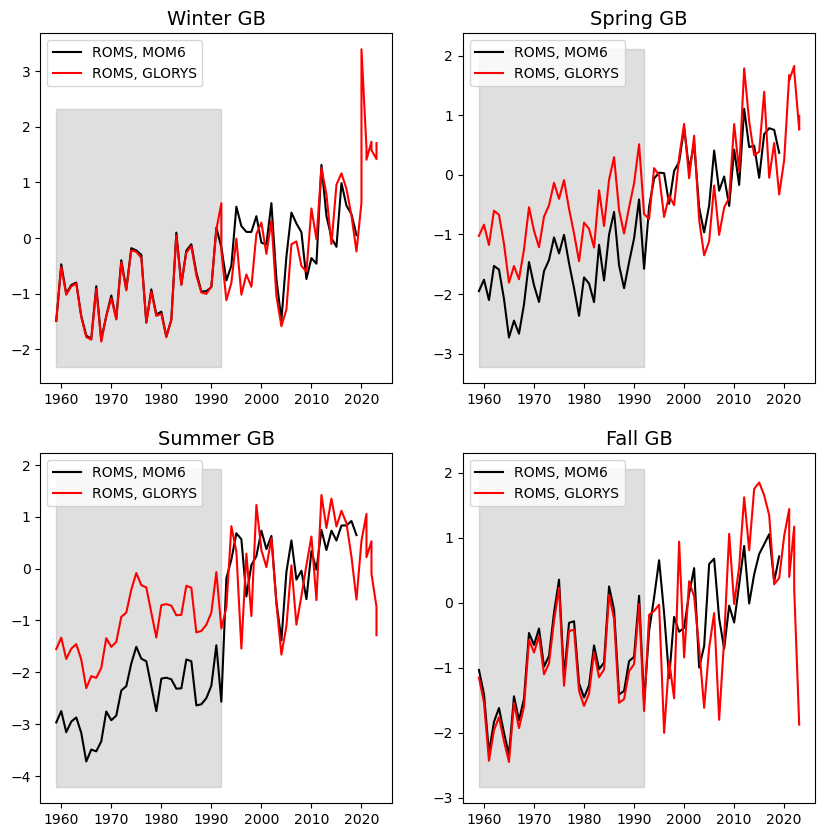

In [346]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = [10,10])

df1 = BT[(BT.Var == 'Winter bottom temp anomaly roms_mom6') & (BT.EPU == 'GB')]
df1a = glorys_bt_ind[(glorys_bt_ind.Var == 'Winter_Bottom Temp Anomaly') & (glorys_bt_ind.EPU == 'GB')]
df2 = BT[(BT.Var == 'Spring bottom temp anomaly roms_mom6') & (BT.EPU == 'GB')]
df2a = glorys_bt_ind[(glorys_bt_ind.Var == 'Spring_Bottom Temp Anomaly') & (glorys_bt_ind.EPU == 'GB')]
df3 = BT[(BT.Var == 'Summer bottom temp anomaly roms_mom6') & (BT.EPU == 'GB')]
df3a = glorys_bt_ind[(glorys_bt_ind.Var == 'Summer_Bottom Temp Anomaly') & (glorys_bt_ind.EPU == 'GB')]
df4 = BT[(BT.Var == 'Fall bottom temp anomaly roms_mom6') & (BT.EPU == 'GB')]
df4a = glorys_bt_ind[(glorys_bt_ind.Var == 'Fall_Bottom Temp Anomaly') & (glorys_bt_ind.EPU == 'GB')]


ax[0,0].plot(df1.Time, df1.Value, c = 'k', label = 'ROMS, MOM6')
#ax[0,0].scatter(df1[df1.Source == 'ROMS'].Time, df1[df1.Source == 'ROMS'].Value, c = 'k', marker = 'o', label = 'ROMS')
#ax[0,0].scatter(df1[df1.Source == 'MOM6'].Time, df1[df1.Source == 'MOM6'].Value, c = 'k', marker = '^', label = 'MOM6')
ax[0,0].plot(df1a.Time, df1a.Value, c = 'r', label = 'ROMS, GLORYS')
ax[0,0].fill_between(np.arange(1959,1993), min(df1.Value)-0.5, max(df1.Value) +1, alpha=0.25, color = 'grey')
#ax[0,0].scatter(df1a[df1a.Source == 'ROMS'].Time, df1a[df1a.Source == 'ROMS'].Value, c = 'r', marker = 'o')
#ax[0,0].scatter(df1a[df1a.Source == 'GLORYS'].Time, df1a[df1a.Source == 'GLORYS'].Value, c = 'r', marker = 's', label = 'GLORYS')
ax[0,0].set_title('Winter GB', fontsize = 14)
ax[0,0].legend()

ax[0,1].plot(df2.Time[:61], df2.Value[:61], c = 'k', label = 'ROMS, MOM6')
ax[0,1].plot(df2a.Time, df2a.Value, c = 'r', label = 'ROMS, GLORYS')
ax[0,1].fill_between(np.arange(1959,1993), min(df2.Value)-0.5, max(df2.Value) +1, alpha=0.25, color = 'grey')
ax[0,1].set_title('Spring GB', fontsize = 14)
ax[0,1].legend()

ax[1,0].plot(df3.Time[:61], df3.Value[:61], c = 'k', label = 'ROMS, MOM6')
ax[1,0].plot(df3a.Time, df3a.Value, c = 'r', label = 'ROMS, GLORYS')
ax[1,0].fill_between(np.arange(1959,1993), min(df3.Value)-0.5, max(df3.Value) +1, alpha=0.25, color = 'grey')
ax[1,0].set_title('Summer GB', fontsize = 14)
ax[1,0].legend()

ax[1,1].plot(df4.Time[:61], df4.Value[:61], c = 'k', label = 'ROMS, MOM6')
ax[1,1].plot(df4a.Time, df4a.Value, c = 'r', label = 'ROMS, GLORYS')
ax[1,1].fill_between(np.arange(1959,1993), min(df4.Value)-0.5, max(df4.Value) +1, alpha=0.25, color = 'grey')
ax[1,1].set_title('Fall GB', fontsize = 14)
ax[1,1].legend()

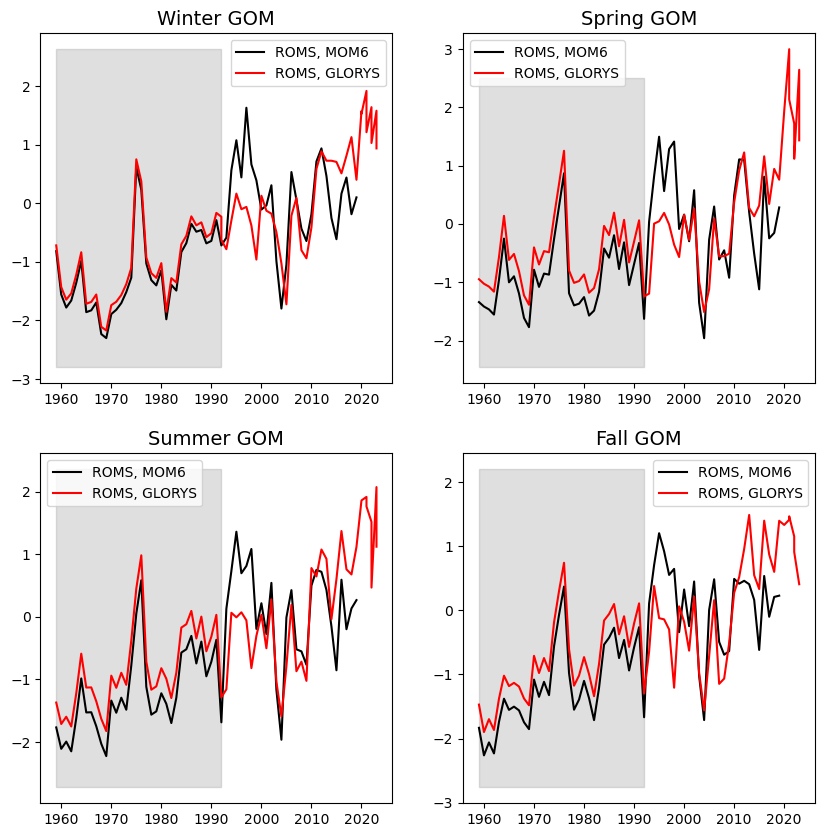

In [347]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = [10,10])

df1 = BT[(BT.Var == 'Winter bottom temp anomaly roms_mom6') & (BT.EPU == 'GOM')]
df1a = glorys_bt_ind[(glorys_bt_ind.Var == 'Winter_Bottom Temp Anomaly') & (glorys_bt_ind.EPU == 'GOM')]
df2 = BT[(BT.Var == 'Spring bottom temp anomaly roms_mom6') & (BT.EPU == 'GOM')]
df2a = glorys_bt_ind[(glorys_bt_ind.Var == 'Spring_Bottom Temp Anomaly') & (glorys_bt_ind.EPU == 'GOM')]
df3 = BT[(BT.Var == 'Summer bottom temp anomaly roms_mom6') & (BT.EPU == 'GOM')]
df3a = glorys_bt_ind[(glorys_bt_ind.Var == 'Summer_Bottom Temp Anomaly') & (glorys_bt_ind.EPU == 'GOM')]
df4 = BT[(BT.Var == 'Fall bottom temp anomaly roms_mom6') & (BT.EPU == 'GOM')]
df4a = glorys_bt_ind[(glorys_bt_ind.Var == 'Fall_Bottom Temp Anomaly') & (glorys_bt_ind.EPU == 'GOM')]


ax[0,0].plot(df1.Time, df1.Value, c = 'k', label = 'ROMS, MOM6')
#ax[0,0].scatter(df1[df1.Source == 'ROMS'].Time, df1[df1.Source == 'ROMS'].Value, c = 'k', marker = 'o', label = 'ROMS')
#ax[0,0].scatter(df1[df1.Source == 'MOM6'].Time, df1[df1.Source == 'MOM6'].Value, c = 'k', marker = '^', label = 'MOM6')
ax[0,0].plot(df1a.Time, df1a.Value, c = 'r', label = 'ROMS, GLORYS')
ax[0,0].fill_between(np.arange(1959,1993), min(df1.Value)-0.5, max(df1.Value) +1, alpha=0.25, color = 'grey')
#ax[0,0].scatter(df1a[df1a.Source == 'ROMS'].Time, df1a[df1a.Source == 'ROMS'].Value, c = 'r', marker = 'o')
#ax[0,0].scatter(df1a[df1a.Source == 'GLORYS'].Time, df1a[df1a.Source == 'GLORYS'].Value, c = 'r', marker = 's', label = 'GLORYS')
ax[0,0].set_title('Winter GOM', fontsize = 14)
ax[0,0].legend()

ax[0,1].plot(df2.Time[:61], df2.Value[:61], c = 'k', label = 'ROMS, MOM6')
ax[0,1].plot(df2a.Time, df2a.Value, c = 'r', label = 'ROMS, GLORYS')
ax[0,1].fill_between(np.arange(1959,1993), min(df2.Value)-0.5, max(df2.Value) +1, alpha=0.25, color = 'grey')
ax[0,1].set_title('Spring GOM', fontsize = 14)
ax[0,1].legend()

ax[1,0].plot(df3.Time[:61], df3.Value[:61], c = 'k', label = 'ROMS, MOM6')
ax[1,0].plot(df3a.Time, df3a.Value, c = 'r', label = 'ROMS, GLORYS')
ax[1,0].fill_between(np.arange(1959,1993), min(df3.Value)-0.5, max(df3.Value) +1, alpha=0.25, color = 'grey')
ax[1,0].set_title('Summer GOM', fontsize = 14)
ax[1,0].legend()

ax[1,1].plot(df4.Time[:61], df4.Value[:61], c = 'k', label = 'ROMS, MOM6')
ax[1,1].plot(df4a.Time, df4a.Value, c = 'r', label = 'ROMS, GLORYS')
ax[1,1].fill_between(np.arange(1959,1993), min(df4.Value)-0.5, max(df4.Value) +1, alpha=0.25, color = 'grey')
ax[1,1].set_title('Fall GOM', fontsize = 14)
ax[1,1].legend()

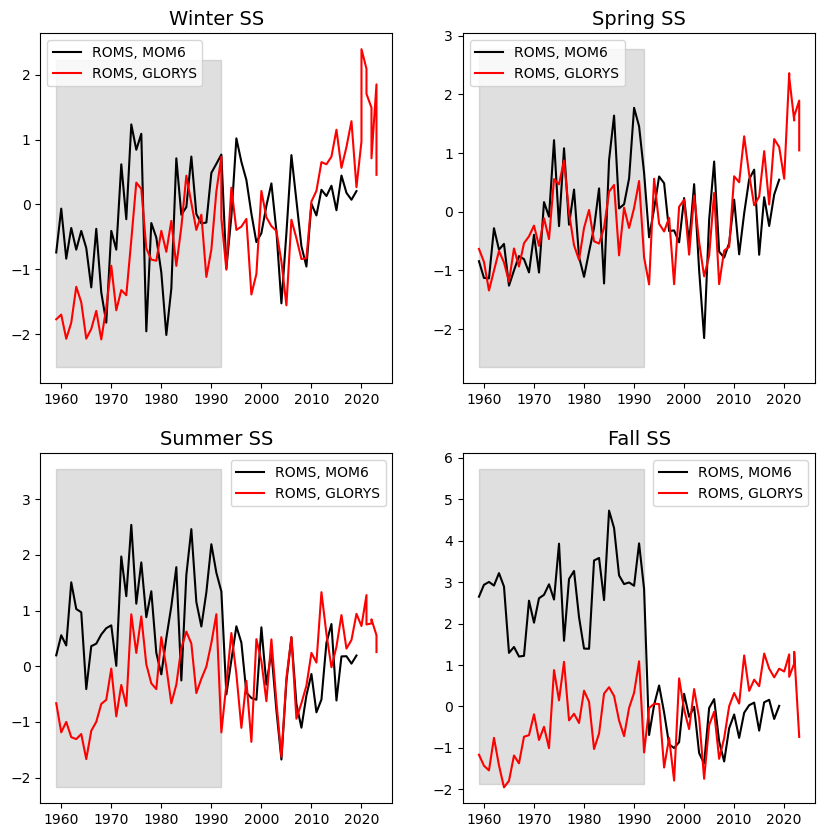

In [299]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = [10,10])

df1 = BT[(BT.Var == 'Winter bottom temp anomaly roms_mom6') & (BT.EPU == 'SS')]
df1a = glorys_bt_ind[(glorys_bt_ind.Var == 'Winter_Bottom Temp Anomaly') & (glorys_bt_ind.EPU == 'SS')]
df2 = BT[(BT.Var == 'Spring bottom temp anomaly roms_mom6') & (BT.EPU == 'SS')]
df2a = glorys_bt_ind[(glorys_bt_ind.Var == 'Spring_Bottom Temp Anomaly') & (glorys_bt_ind.EPU == 'SS')]
df3 = BT[(BT.Var == 'Summer bottom temp anomaly roms_mom6') & (BT.EPU == 'SS')]
df3a = glorys_bt_ind[(glorys_bt_ind.Var == 'Summer_Bottom Temp Anomaly') & (glorys_bt_ind.EPU == 'SS')]
df4 = BT[(BT.Var == 'Fall bottom temp anomaly roms_mom6') & (BT.EPU == 'SS')]
df4a = glorys_bt_ind[(glorys_bt_ind.Var == 'Fall_Bottom Temp Anomaly') & (glorys_bt_ind.EPU == 'SS')]


ax[0,0].plot(df1.Time[:61], df1.Value[:61], c = 'k', label = 'ROMS, MOM6')
#ax[0,0].scatter(df1[df1.Source == 'ROMS'].Time, df1[df1.Source == 'ROMS'].Value, c = 'k', marker = 'o', label = 'ROMS')
#ax[0,0].scatter(df1[df1.Source == 'MOM6'].Time, df1[df1.Source == 'MOM6'].Value, c = 'k', marker = '^', label = 'MOM6')
ax[0,0].plot(df1a.Time, df1a.Value, c = 'r', label = 'ROMS, GLORYS')
ax[0,0].fill_between(np.arange(1959,1993), min(df1.Value)-0.5, max(df1.Value) +1, alpha=0.25, color = 'grey')
#ax[0,0].scatter(df1a[df1a.Source == 'ROMS'].Time, df1a[df1a.Source == 'ROMS'].Value, c = 'r', marker = 'o')
#ax[0,0].scatter(df1a[df1a.Source == 'GLORYS'].Time, df1a[df1a.Source == 'GLORYS'].Value, c = 'r', marker = 's', label = 'GLORYS')
ax[0,0].set_title('Winter SS', fontsize = 14)
ax[0,0].legend()

ax[0,1].plot(df2.Time[:61], df2.Value[:61], c = 'k', label = 'ROMS, MOM6')
ax[0,1].plot(df2a.Time, df2a.Value, c = 'r', label = 'ROMS, GLORYS')
ax[0,1].fill_between(np.arange(1959,1993), min(df2.Value)-0.5, max(df2.Value) +1, alpha=0.25, color = 'grey')
ax[0,1].set_title('Spring SS', fontsize = 14)
ax[0,1].legend()

ax[1,0].plot(df3.Time[:61], df3.Value[:61], c = 'k', label = 'ROMS, MOM6')
ax[1,0].plot(df3a.Time, df3a.Value, c = 'r', label = 'ROMS, GLORYS')
ax[1,0].fill_between(np.arange(1959,1993), min(df3.Value)-0.5, max(df3.Value) +1, alpha=0.25, color = 'grey')
ax[1,0].set_title('Summer SS', fontsize = 14)
ax[1,0].legend()

ax[1,1].plot(df4.Time[:61], df4.Value[:61], c = 'k', label = 'ROMS, MOM6')
ax[1,1].plot(df4a.Time, df4a.Value, c = 'r', label = 'ROMS, GLORYS')
ax[1,1].fill_between(np.arange(1959,1993), min(df4.Value)-0.5, max(df4.Value) +1, alpha=0.25, color = 'grey')
ax[1,1].set_title('Fall SS', fontsize = 14)
ax[1,1].legend()

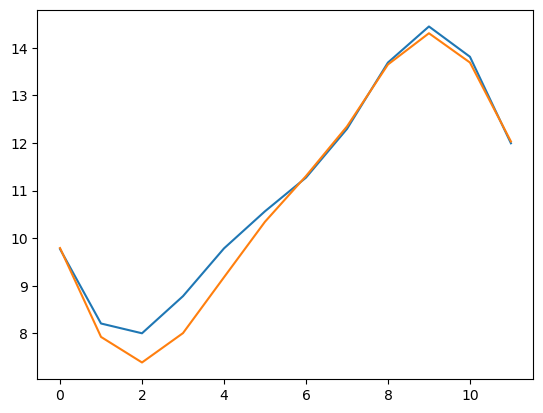

In [321]:
plt.plot(mab_m6_ts.groupby('time.month').mean('time').tob)
plt.plot(glorys_mab_ts.groupby('time.month').mean('time').bottomT)

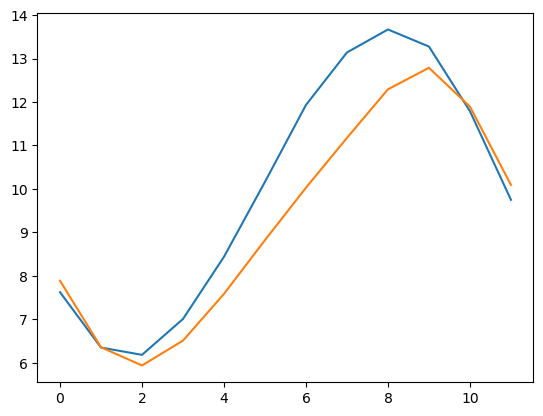

In [318]:
plt.plot(gb_m6_ts.groupby('time.month').mean('time').tob)
plt.plot(glorys_gb_ts.groupby('time.month').mean('time').bottomT)

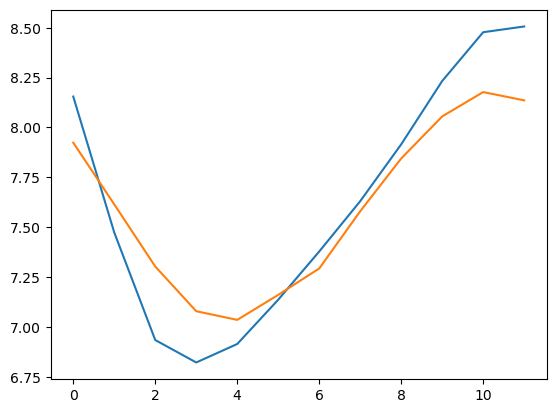

In [319]:
plt.plot(gom_m6_ts.groupby('time.month').mean('time').tob)
plt.plot(glorys_gom_ts.groupby('time.month').mean('time').bottomT)

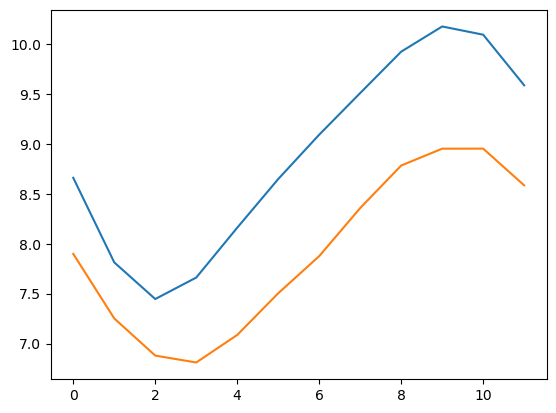

In [323]:
plt.plot(ss_m6_ts.groupby('time.month').mean('time').tob)
plt.plot(glorys_ss_ts.groupby('time.month').mean('time').bottomT)


In [317]:
glorys = xr.open_dataset('glorys_bt_cropped.nc')
glorys_mab = reupy.crop_nd(glorys, 'longitude', 'latitude', mab)
glorys_mab_ts = glorys_mab.mean(['latitude','longitude'])

glorys_gb = reupy.crop_nd(glorys, 'longitude', 'latitude', gb)
glorys_gb_ts = glorys_gb.mean(['latitude','longitude'])

glorys_ss = reupy.crop_nd(glorys, 'longitude', 'latitude', ss)
glorys_ss_ts = glorys_ss.mean(['latitude','longitude'])

glorys_gom = reupy.crop_nd(glorys, 'longitude', 'latitude', mab)
glorys_gom_ts = glorys_gom.mean(['latitude','longitude'])



In [265]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = [10,10])

df1 = BT[(BT.Var == 'Winter bottom temp anomaly roms_mom6') & (BT.EPU == 'MAB')]
df1a = glorys_bt_ind[(glorys_bt_ind.Var == 'Winter_Bottom Temp Anomaly') & (glorys_bt_ind.EPU == 'MAB')]
df2 = BT[(BT.Var == 'Spring bottom temp anomaly roms_mom6') & (BT.EPU == 'MAB')]
df3 = BT[(BT.Var == 'Summer bottom temp anomaly roms_mom6') & (BT.EPU == 'MAB')]
df4 = BT[(BT.Var == 'Fall bottom temp anomaly roms_mom6') & (BT.EPU == 'MAB')]

ax[0,0].plot(df1.Time, df1.Value, c = 'k')
ax[0,0].scatter(df1[df1.Source == 'ROMS'].Time, df1[df1.Source == 'ROMS'].Value, c = 'k', marker = 's', label = 'ROMS')
ax[0,0].scatter(df1[df1.Source == 'MOM6'].Time, df1[df1.Source == 'MOM6'].Value, c = 'k', marker = '^', label = 'MOM6')
ax[0,0].plot(df1a.Time, df1a.Value, linestyle = ':', c = 'k')
ax[0,0].scatter(df1a[df1a.Source == 'ROMS'].Time, df1a[df1a.Source == 'ROMS'].Value, c = 'k', marker = 's')
ax[0,0].scatter(df1a[df1a.Source == 'GLORYS'].Time, df1a[df1a.Source == 'GLORYS'].Value, c = 'k', marker = '^', label = 'GLORYS')
ax[0,0].set_title('Winter MAB', fontsize = 14)

ax[0,1].plot(np.arange(1993, 2022), springs_mab_gl - np.nanmean(springs_mab_gl), c = 'k')
ax[0,1].scatter(np.arange(1993, 2022), springs_mab_gl - np.nanmean(springs_mab_gl), c = 'k')
ax[0,1].plot(np.arange(1993, 2020), springs_mab_m6 - np.nanmean(springs_mab_m6), c = 'k', linestyle = ':')
ax[0,1].scatter(np.arange(1993, 2020), springs_mab_m6 - np.nanmean(springs_mab_m6),facecolor = 'none', edgecolor = 'k')
ax[0,1].set_title('Spring MAB', fontsize = 14)

ax[1,0].plot(np.arange(1993, 2022), summers_mab_gl - np.nanmean(summers_mab_gl), c = 'k')
ax[1,0].scatter(np.arange(1993, 2022), summers_mab_gl - np.nanmean(summers_mab_gl), c = 'k')
ax[1,0].plot(np.arange(1993, 2020), summers_mab_m6 - np.nanmean(summers_mab_m6), c = 'k', linestyle = ':')
ax[1,0].scatter(np.arange(1993, 2020), summers_mab_m6 - np.nanmean(summers_mab_m6),facecolor = 'none', edgecolor = 'k')
ax[1,0].set_title('Summer MAB', fontsize = 14)

ax[1,1].plot(np.arange(1993, 2021), autumns_mab_gl - np.nanmean(autumns_mab_gl), c = 'k')
ax[1,1].scatter(np.arange(1993, 2021), autumns_mab_gl - np.nanmean(autumns_mab_gl), c = 'k')
ax[1,1].plot(np.arange(1993, 2020), autumns_mab_m6 - np.nanmean(autumns_mab_m6), c = 'k', linestyle = ':')
ax[1,1].scatter(np.arange(1993, 2020), autumns_mab_m6 - np.nanmean(autumns_mab_m6),facecolor = 'none', edgecolor = 'k')
ax[1,1].set_title('Autumn MAB', fontsize = 14)

ax[0,0].legend(loc='upper left')
ax[0,0].set_ylabel('Bottom Temperature Anomaly ($^\circ$C)', fontsize = 12)
ax[0,0].yaxis.set_label_coords(-0.15,-0.2)

,Time,Value,EPU,Source,Var,Units
0,1959,-1.359687,MAB,ROMS,Winter bottom temp anomaly roms_mom6,degrees C
1,1960,-0.683389,MAB,ROMS,Winter bottom temp anomaly roms_mom6,degrees C
2,1961,-1.455608,MAB,ROMS,Winter bottom temp anomaly roms_mom6,degrees C
3,1962,-0.981730,MAB,ROMS,Winter bottom temp anomaly roms_mom6,degrees C
4,1963,-1.316508,MAB,ROMS,Winter bottom temp anomaly roms_mom6,degrees C
...,...,...,...,...,...,...
22,2015,6.741751,GOM,MOM6,Annual_Bottom Temp,degrees C
23,2016,8.070062,GOM,MOM6,Annual_Bottom Temp,degrees C
24,2017,7.517481,GOM,MOM6,Annual_Bottom Temp,degrees C
25,2018,7.544405,GOM,MOM6,Annual_Bottom Temp,degrees C


In [235]:
glorys_bt_ind = pn.read_csv('bottom_temp_indicator_glorys_2023.csv')

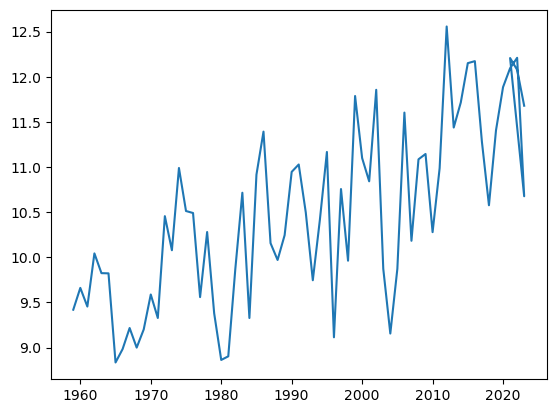

In [251]:
plt.plot(glorys_bt_ind[(glorys_bt_ind.Var == 'Annual_Bottom Temp') & (glorys_bt_ind.EPU == 'MAB')].Time, glorys_bt_ind[(glorys_bt_ind.Var == 'Annual_Bottom Temp') & (glorys_bt_ind.EPU == 'MAB')].Value)

In [266]:
np.unique(glorys_bt_ind.Var)

array(['Annual_Bottom Temp', 'Fall_Bottom Temp Anomaly',
       'Spring_Bottom Temp Anomaly', 'Summer_Bottom Temp Anomaly',
       'Winter_Bottom Temp Anomaly'], dtype=object)

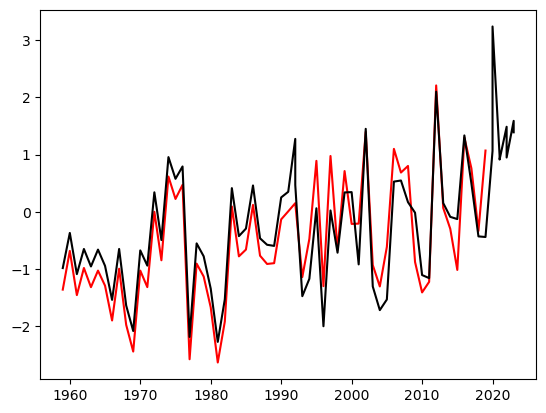

In [238]:
plt.plot(BT.loc[(BT.EPU == 'MAB') & (BT.Var == 'Winter bottom temp anomaly roms_mom6')].Time,
         BT.loc[(BT.EPU == 'MAB') & (BT.Var == 'Winter bottom temp anomaly roms_mom6')].Value, c = 'r')
plt.plot(glorys_bt_ind.loc[(glorys_bt_ind.EPU == 'MAB') & (glorys_bt_ind.Var == 'Winter_Bottom Temp Anomaly')].Time,
         glorys_bt_ind.loc[(glorys_bt_ind.EPU == 'MAB') & (glorys_bt_ind.Var == 'Winter_Bottom Temp Anomaly')].Value, c = 'k')
         

In [103]:
mab_hp_m6_ts_seasonal = mab_hp_ts.resample(time = 'QE-JAN').mean()
winter_clim_mab_hp_m6 = mab_hp_m6_ts_seasonal.tob.sel(time = slice('1990-01-01','2020-12-31'))[np.arange(0,137,4)].mean()
spring_clim_mab_hp_m6 = mab_hp_m6_ts_seasonal.tob[np.arange(1,137,4)].mean()

In [43]:
clim_mab_hp_m6 = mab_hp_m6_ts.sel(time = slice('1990-01-01','2020-12-31')).groupby('time.month').mean('time')

In [ ]:
seasonal_avgs_mab_m6 = mab_m6.mean(['lat','lon']).resample(time = 'QE-JAN').mean()
seasonal_avgs_mab_hp_roms = mab_gl.mean(['latitude','longitude']).resample(time = 'QE-JAN').mean()

In [47]:
mab_hp_ts_anom = mab_hp_ts.groupby('time.month') - clim_mab_hp_m6

In [48]:
mab_m6_ts_anom = mab_m6_ts.groupby('time.month') - clim_mab_hp_m6

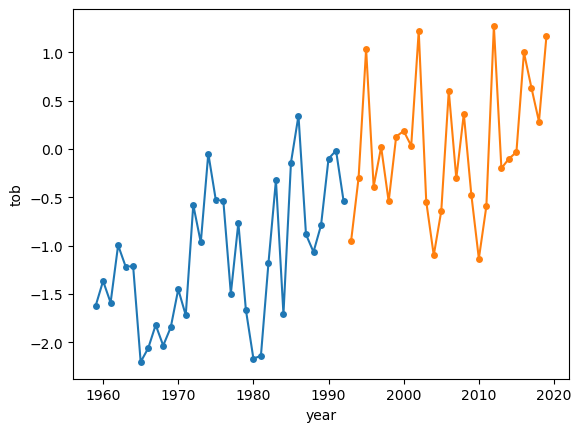

In [61]:
mab_hp_ts_anom.groupby('time.year').mean().tob.plot.scatter()
mab_hp_ts_anom.groupby('time.year').mean().tob.plot.line()
mab_m6_ts_anom.groupby('time.year').mean().tob.plot.scatter()
mab_m6_ts_anom.groupby('time.year').mean().tob.plot.line()

In [239]:
BT

,Time,Value,EPU,Source,Var,Units
0,1959,-1.359687,MAB,ROMS,Winter bottom temp anomaly roms_mom6,degrees C
1,1960,-0.683389,MAB,ROMS,Winter bottom temp anomaly roms_mom6,degrees C
2,1961,-1.455608,MAB,ROMS,Winter bottom temp anomaly roms_mom6,degrees C
3,1962,-0.981730,MAB,ROMS,Winter bottom temp anomaly roms_mom6,degrees C
4,1963,-1.316508,MAB,ROMS,Winter bottom temp anomaly roms_mom6,degrees C
...,...,...,...,...,...,...
56,2015,0.022586,GOM,MOM6,Fall bottom temp anomaly roms_mom6,degrees C
57,2016,0.705741,GOM,MOM6,Fall bottom temp anomaly roms_mom6,degrees C
58,2017,0.766076,GOM,MOM6,Fall bottom temp anomaly roms_mom6,degrees C
59,2018,0.303733,GOM,MOM6,Fall bottom temp anomaly roms_mom6,degrees C
